In [1]:
import pandas as pd
import yfinance as yf

In [2]:
#Importando as listas de ativos que distribuiram dividendos desde 2007

file_names = ['ativos_div_2007.csv', 'ativos_div_2008.csv', 'ativos_div_2009.csv', 'ativos_div_2010.csv', 'ativos_div_2011.csv', 'ativos_div_2012.csv', 'ativos_div_2013.csv', 'ativos_div_2014.csv', 'ativos_div_2015.csv', 'ativos_div_2016.csv', 'ativos_div_2017.csv', 'ativos_div_2018.csv', 'ativos_div_2019.csv', 'ativos_div_2020.csv', 'ativos_div_2021.csv', 'ativos_div_2022.csv']

for file in file_names:
    list_name = file.split('.')[0]
    df = pd.read_csv(file)
    lista = df.values.tolist()
    flat_list = []
    for sublist in lista:
        for item in sublist:
            flat_list.append(item)
    locals()[list_name] = flat_list

In [4]:
#Tratando os dados de 2007

lista_2007 = []
for a in ativos_div_2007:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2007-01-02',end='2007-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2007.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2007 = pd.DataFrame(lista_2007, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  ALPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRKM5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRSR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CPLE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CPLE6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GGBR4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GOAU4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GOLL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITSA3.SA
[*********************100%***********************

In [6]:
df2007.sort_values(by='Dividend Yield', ascending=False)

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Setor
7,GOAU4.SA,1.105000,61.547210,28.824265,0.038336,Basic Materials
4,CPLE6.SA,0.107800,7.242897,2.817853,0.038256,Utilities
11,PEAB3.SA,0.970000,26.086957,25.457061,0.038103,Financial Services
3,CPLE3.SA,0.098000,35.011447,2.654547,0.036918,Utilities
12,PETR4.SA,0.908200,76.800003,27.187980,0.033404,Energy
6,GGBR4.SA,0.660000,47.655587,22.153857,0.029792,Basic Materials
22,JOPA4.SA,0.674820,114.697991,25.739388,0.026217,Consumer Defensive
23,KLBN3.SA,0.035994,-24.999998,1.407012,0.025582,Basic Materials
21,MNDL3.SA,0.889996,72.972971,47.454143,0.018755,Consumer Defensive
8,GOLL4.SA,0.842769,-31.097466,53.568000,0.015733,Industrials


In [7]:
#Carteira 01: selecionar os dois melhores ativos de cada ano por setor

In [10]:
#Seleção de ativos de 2007

carteira_topsetor_2007 = df2007.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2007

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                     
Basic Materials    7   GOAU4.SA        1.105000   61.547210   28.824265   
                   6   GGBR4.SA        0.660000   47.655587   22.153857   
Consumer Cyclical  19  WHRL3.SA        0.042600   81.818178    4.173061   
                   0   ALPA3.SA        0.019414   30.612406    5.239490   
Consumer Defensive 22  JOPA4.SA        0.674820  114.697991   25.739388   
                   21  MNDL3.SA        0.889996   72.972971   47.454143   
Energy             12  PETR4.SA        0.908200   76.800003   27.187980   
                   5   CSAN3.SA        0.100156  -53.875217    7.244692   
Financial Services 11  PEAB3.SA        0.970000   26.086957   25.457061   
                   9   ITSA3.SA        0.084235   30.769247    6.928873   
Industrials        8   GOLL4.SA        0.842769  -31.097466   53.568000   
                   20  ROMI3.SA        0.155844   40.443042   15.037385   
Utilities          4   CPLE6.SA        0.107800    7.242897    2.817853   
                   3   CPLE3.SA        0.098000   35.011447    2.654547   

                       Dividend Yield               Setor  
Setor                                                      
Basic Materials    7         0.038336     Basic Materials  
                   6         0.029792     Basic Materials  
Consumer Cyclical  19        0.010208   Consumer Cyclical  
                   0         0.003705   Consumer Cyclical  
Consumer Defensive 22        0.026217  Consumer Defensive  
                   21        0.018755  Consumer Defensive  
Energy             12        0.033404              Energy  
                   5         0.013825              Energy  
Financial Services 11        0.038103  Financial Services  
                   9         0.012157  Financial Services  
Industrials        8         0.015733         Industrials  
                   20        0.010364         Industrials  
Utilities          4         0.038256           Utilities  
                   3         0.036918           Utilities

In [11]:
ativos_carteira2008 = carteira_topsetor_2007['Ativo'].tolist()
ativos_carteira2008

['GOAU4.SA',
 'GGBR4.SA',
 'WHRL3.SA',
 'ALPA3.SA',
 'JOPA4.SA',
 'MNDL3.SA',
 'PETR4.SA',
 'CSAN3.SA',
 'PEAB3.SA',
 'ITSA3.SA',
 'GOLL4.SA',
 'ROMI3.SA',
 'CPLE6.SA',
 'CPLE3.SA']

In [12]:
#Tratando os dados de 2008

lista_2008 = []
for a in ativos_div_2008:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2008-01-02',end='2008-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2008.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2008 = pd.DataFrame(lista_2008, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMEB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRIV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRKM3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRKM5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CCRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CEEB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CMIG3.SA
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PNVL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRSR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TRPL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MYPK3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VULC3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TCNO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BGIP3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMKS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando n

In [22]:
# Back testing em 2008 da carteria

valor_carteira = 100000

lista_ativos_carteira2008 = []
for a in ativos_carteira2008:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2008-01-02',end='2008-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira / len(ativos_carteira2008))) / dados['Open'][0])
    pl = ((valor_carteira / len(ativos_carteira2008)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2008.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2008 = pd.DataFrame(lista_ativos_carteira2008, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  GOAU4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GGBR4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JOPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MNDL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PETR4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PEAB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITSA3.SA
[*********************100%***********************

In [23]:
df_ativos_carteira2008

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,GOAU4.SA,1.425000,-43.107349,35.798876,0.039806,201.775617,-3079.096344,287.530254,-2791.566090,Basic Materials
1,GGBR4.SA,0.890000,-42.032330,26.996345,0.032967,274.936769,-3002.309280,244.693725,-2757.615556,Basic Materials
2,WHRL3.SA,0.455200,-24.812030,3.142128,0.144870,1790.189756,-1772.287875,814.894377,-957.393498,Consumer Cyclical
3,ALPA3.SA,0.061971,-77.428928,3.324468,0.018641,1410.639113,-5530.637715,87.418716,-5443.218999,Consumer Cyclical
4,JOPA4.SA,0.163262,-44.357614,27.936185,0.005844,223.284064,-3168.400981,36.453803,-3131.947179,Consumer Defensive
5,MNDL3.SA,0.177407,-8.854164,41.833801,0.004241,186.004469,-632.440314,32.998495,-599.441819,Consumer Defensive
6,PETR4.SA,0.300500,-47.488215,35.560562,0.008450,164.222493,-3392.015385,49.348859,-3342.666526,Energy
7,CSAN3.SA,0.000000,-45.621693,4.926789,0.000000,1555.305795,-3258.692372,0.000000,-3258.692372,Energy
8,PEAB3.SA,2.230000,37.931034,35.487711,0.062839,246.305419,2709.359606,549.261084,3258.620690,Financial Services
9,ITSA3.SA,0.038845,-33.057696,6.327057,0.006140,993.788424,-2361.263970,38.603711,-2322.660259,Financial Services


In [24]:
# Calcular os resultados da Carteira

ganho_carteira2008 = df_ativos_carteira2008["Ganho Total"].sum()
perc_carteira2008 = (ganho_carteira2008 / valor_carteira) * 100
totaldividendos_carteira2008 = df_ativos_carteira2008["Div. Recebidos"].sum()
perc_dividendos_carteira2008 = (totaldividendos_carteira2008 / valor_carteira) * 100

# Criar o dataframe
resultado_carteira2008 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2008, 2), round(perc_carteira2008,2), round(totaldividendos_carteira2008,2), round(perc_dividendos_carteira2008,2)]
})

# Exibir o dataframe
resultado_carteira2008

,Parametros,Valores
0,Ganho da Carteira,-33607.56
1,Ganho Percentual,-33.61
2,Total de Dividendos,2668.23
3,Dividendo (%),2.67


In [25]:
#Seleção de ativos de 2008

carteira_topsetor_2008 = df2008.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2008

Ativo  SomaDividendos     DeltaP  PrecoMedio  \
Setor                                                                    
Basic Materials    6   BRKM5.SA        0.644625 -61.697721   11.706948   
                   5   BRKM3.SA        0.644625 -62.866666   12.218313   
Consumer Cyclical  70  WHRL3.SA        0.455200 -24.812030    3.142128   
                   78  CEDO3.SA        0.621613  -8.447723   10.028765   
Consumer Defensive 73  JOPA3.SA        0.593680 -46.094277   29.848795   
                   44  MDIA3.SA        0.089262 -20.840007    6.788701   
Energy             93  UGPA3.SA        0.153733  -2.500000    7.419352   
                   50  PETR4.SA        0.300500 -47.488215   35.560562   
Financial Services 80  BRSR3.SA        0.585546 -30.476189    8.891727   
                   76  PEAB3.SA        2.230000  37.931034   35.487711   
Healthcare         79  PNVL3.SA        0.014247 -53.273977    1.419617   
                   47  ODPV3.SA        0.027204 -47.126454    3.066640   
Industrials        23  ETER3.SA        0.809753 -28.929070   18.185065   
                   46  MOAR3.SA        4.603854   4.588234  103.647305   
Real Estate        42  LPSB3.SA        0.349612 -81.142860   11.863419   
                   72  CRDE3.SA        3.901480 -77.551020  171.159840   
Technology         62  TOTS3.SA        0.115120 -38.350005    3.275682   
                   52  POSI3.SA        0.379436 -84.134284   16.390080   
Utilities          92  EQTL3.SA        0.534868 -88.804474    2.854544   
                   10  CPFE3.SA        1.300539 -10.534123   16.410736   

                       Dividend Yield               Setor  
Setor                                                      
Basic Materials    6         0.055063     Basic Materials  
                   5         0.052759     Basic Materials  
Consumer Cyclical  70        0.144870   Consumer Cyclical  
                   78        0.061983   Consumer Cyclical  
Consumer Defensive 73        0.019890  Consumer Defensive  
                   44        0.013149  Consumer Defensive  
Energy             93        0.020721              Energy  
                   50        0.008450              Energy  
Financial Services 80        0.065853  Financial Services  
                   76        0.062839  Financial Services  
Healthcare         79        0.010036          Healthcare  
                   47        0.008871          Healthcare  
Industrials        23        0.044528         Industrials  
                   46        0.044418         Industrials  
Real Estate        42        0.029470         Real Estate  
                   72        0.022794         Real Estate  
Technology         62        0.035144          Technology  
                   52        0.023150          Technology  
Utilities          92        0.187374           Utilities  
                   10        0.079249           Utilities

In [18]:
ativos_carteira2009 = carteira_topsetor_2008['Ativo'].tolist()
ativos_carteira2009

['BRKM5.SA',
 'BRKM3.SA',
 'WHRL3.SA',
 'CEDO3.SA',
 'JOPA3.SA',
 'MDIA3.SA',
 'UGPA3.SA',
 'PETR4.SA',
 'BRSR3.SA',
 'PEAB3.SA',
 'PNVL3.SA',
 'ODPV3.SA',
 'ETER3.SA',
 'MOAR3.SA',
 'LPSB3.SA',
 'CRDE3.SA',
 'TOTS3.SA',
 'POSI3.SA',
 'EQTL3.SA',
 'CPFE3.SA']

In [26]:
# Back testing em 2009 da carteria

valor_carteira_2009 = (100000 + ganho_carteira2008)

lista_ativos_carteira2009 = []
for a in ativos_carteira2009:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2009-01-02',end='2009-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2009 / len(ativos_carteira2009))) / dados['Open'][0])
    pl = ((valor_carteira_2009 / len(ativos_carteira2009)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2009.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2009 = pd.DataFrame(lista_ativos_carteira2009, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  BRKM5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRKM3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CEDO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JOPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MDIA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UGPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PETR4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRSR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PEAB3.SA
[*********************100%***********************

In [27]:
df_ativos_carteira2009

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,BRKM5.SA,0.000000,149.645395,8.546290,0.000000,588.585449,4967.661227,0.000000,4967.661227,Basic Materials
1,BRKM3.SA,0.000000,118.245614,8.112379,0.000000,582.389819,3925.307246,0.000000,3925.307246,Basic Materials
2,WHRL3.SA,0.042600,16.666667,3.179839,0.013397,1106.540619,553.270309,47.138630,600.408940,Consumer Cyclical
3,CEDO3.SA,0.035691,27.720099,11.797664,0.003025,357.597676,920.202479,12.763019,932.965497,Consumer Cyclical
4,JOPA3.SA,0.743815,17.801376,17.459355,0.042603,207.346771,590.938377,154.227639,745.166016,Consumer Defensive
5,MDIA3.SA,0.093048,103.431362,9.568803,0.009724,488.179671,3433.530105,45.424142,3478.954247,Consumer Defensive
6,UGPA3.SA,0.102341,0.000000,7.312500,0.013995,453.965382,0.000000,46.459271,46.459271,Energy
7,PETR4.SA,1.051600,57.670812,31.839516,0.033028,142.656716,1914.452873,150.017803,2064.470676,Energy
8,BRSR3.SA,0.504195,100.000000,9.056653,0.055671,518.690907,3319.621856,261.521362,3581.143218,Financial Services
9,PEAB3.SA,5.700000,-2.500000,41.011330,0.138986,82.990546,-82.990546,473.046115,390.055568,Financial Services


In [70]:
# Calcular os resultados da Carteira

ganho_carteira2009 = df_ativos_carteira2009["Ganho Total"].sum()
perc_carteira2009 = (ganho_carteira2009 / valor_carteira_2009) * 100
totaldividendos_carteira2009 = df_ativos_carteira2009["Div. Recebidos"].sum()
perc_dividendos_carteira2009 = (totaldividendos_carteira2009 / valor_carteira_2009) * 100

# Criar o dataframe
resultado_carteira2009 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2009, 2), round(perc_carteira2009,2), round(totaldividendos_carteira2009,2), round(perc_dividendos_carteira2009,2)]
})

# Exibir o dataframe
resultado_carteira2009

,Parametros,Valores
0,Ganho da Carteira,62305.06
1,Ganho Percentual,93.84
2,Total de Dividendos,3283.01
3,Dividendo (%),4.94


In [29]:
#Tratando os dados de 2009

lista_2009 = []
for a in ativos_div_2009:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2009-01-02',end='2009-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2009.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2009 = pd.DataFrame(lista_2009, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBAS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BEES3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMEB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRAP3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRAP4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRSR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CCRO3.SA
[*********************100%***********************

In [30]:
#Seleção de ativos de 2009

carteira_topsetor_2009 = df2009.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2009

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                     
Basic Materials    16  CSNA3.SA        1.076835   85.335574   23.105988   
                   95  PATI3.SA        0.250476  -22.346366    6.344502   
Consumer Cyclical  80  ALPA3.SA        0.202464  218.169836    2.091885   
                   90  SLED3.SA       50.212172   23.684214  753.173182   
Consumer Defensive 99  JOPA4.SA        0.818197   15.168544   17.997822   
                   85  JOPA3.SA        0.743815   17.801376   17.459355   
Energy             50  PETR4.SA        1.051600   57.670812   31.839516   
                   49  PETR3.SA        1.051600   49.496412   38.330323   
Financial Services 57  SANB4.SA       49.025115   69.230765    9.138719   
                   87  SANB3.SA       46.690576   46.666678    9.618250   
Healthcare         47  ODPV3.SA        0.219327  165.332783    2.798719   
                   51  PNVL3.SA        0.051237   95.317787    1.301199   
Industrials        24  ETER3.SA        1.050844   66.994112   19.303221   
                   74  MOAR3.SA        4.101610   -5.624298   76.493515   
Real Estate        38  JHSF3.SA        0.228496  123.636370    2.564435   
                   26  EZTC3.SA        0.092708  253.813714    3.708923   
Services           41  LLIS3.SA        0.833324   73.740062    9.134162   
Technology         82  FRIO3.SA        8.354639   37.222223  214.366664   
                   53  POSI3.SA        0.296596  214.285714   12.498508   
Utilities          23  EQTL3.SA        0.372344   72.277300    3.006831   
                   39  LIGT3.SA        2.396739   12.742891   24.515202   

                       Dividend Yield               Setor  
Setor                                                      
Basic Materials    16        0.046604     Basic Materials  
                   95        0.039479     Basic Materials  
Consumer Cyclical  80        0.096785   Consumer Cyclical  
                   90        0.066667   Consumer Cyclical  
Consumer Defensive 99        0.045461  Consumer Defensive  
                   85        0.042603  Consumer Defensive  
Energy             50        0.033028              Energy  
                   49        0.027435              Energy  
Financial Services 57        5.364550  Financial Services  
                   87        4.854373  Financial Services  
Healthcare         47        0.078367          Healthcare  
                   51        0.039377          Healthcare  
Industrials        24        0.054439         Industrials  
                   74        0.053620         Industrials  
Real Estate        38        0.089102         Real Estate  
                   26        0.024996         Real Estate  
Services           41        0.091232            Services  
Technology         82        0.038974          Technology  
                   53        0.023731          Technology  
Utilities          23        0.123833           Utilities  
                   39        0.097765           Utilities

In [31]:
ativos_carteira2010 = carteira_topsetor_2009['Ativo'].tolist()
ativos_carteira2010

['CSNA3.SA',
 'PATI3.SA',
 'ALPA3.SA',
 'SLED3.SA',
 'JOPA4.SA',
 'JOPA3.SA',
 'PETR4.SA',
 'PETR3.SA',
 'SANB4.SA',
 'SANB3.SA',
 'ODPV3.SA',
 'PNVL3.SA',
 'ETER3.SA',
 'MOAR3.SA',
 'JHSF3.SA',
 'EZTC3.SA',
 'LLIS3.SA',
 'FRIO3.SA',
 'POSI3.SA',
 'EQTL3.SA',
 'LIGT3.SA']

In [32]:
# Back testing em 2010 da carteria

valor_carteira_2010 = (valor_carteira_2009 + ganho_carteira2009)

lista_ativos_carteira2010 = []
for a in ativos_carteira2010:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2010-01-02',end='2010-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2010 / len(ativos_carteira2010))) / dados['Open'][0])
    pl = ((valor_carteira_2010 / len(ativos_carteira2010)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2010.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2010 = pd.DataFrame(lista_ativos_carteira2010, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  CSNA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PATI3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SLED3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JOPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JOPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PETR4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PETR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SANB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SANB3.SA
[*********************100%***********************

In [33]:
df_ativos_carteira2010

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,CSNA3.SA,1.028830,-4.767003,30.042105,0.034246,218.834230,-292.143497,225.143221,-67.000276,Basic Materials
1,PATI3.SA,0.072867,74.720384,9.148694,0.007965,908.719252,4579.203166,66.215646,4645.418812,Basic Materials
2,ALPA3.SA,0.070717,71.900848,5.219641,0.013548,1685.324699,4406.409278,119.181107,4525.590385,Consumer Cyclical
3,SLED3.SA,0.000000,29.787233,1040.936864,0.000000,7.450894,1825.496390,0.000000,1825.496390,Consumer Cyclical
4,JOPA4.SA,0.100330,-2.536588,21.174291,0.004738,298.948899,-155.453564,29.993543,-125.460021,Consumer Defensive
5,JOPA3.SA,0.091210,16.648989,20.076356,0.004543,324.944445,1020.325358,29.638183,1049.963541,Consumer Defensive
6,PETR4.SA,0.813200,-26.143436,29.715101,0.027367,165.857978,-1602.188046,134.875708,-1467.312338,Energy
7,PETR3.SA,0.782085,-26.738612,33.481134,0.023359,146.965283,-1638.663133,114.939344,-1523.723790,Energy
8,SANB4.SA,0.293314,-9.523811,10.223582,0.028690,555.874250,-583.662237,163.045700,-420.616537,Financial Services
9,SANB3.SA,0.279287,0.000000,12.211214,0.022871,464.281335,0.000000,129.667741,129.667741,Financial Services


In [69]:
# Calcular os resultados da Carteira

ganho_carteira2010 = df_ativos_carteira2010["Ganho Total"].sum()
perc_carteira2010 = (ganho_carteira2010 / valor_carteira_2010) * 100
totaldividendos_carteira2010 = df_ativos_carteira2010["Div. Recebidos"].sum()
perc_dividendos_carteira2010 = (totaldividendos_carteira2010 / valor_carteira_2010) * 100

# Criar o dataframe
resultado_carteira2010 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2010, 2), round(perc_carteira2010,2), round(totaldividendos_carteira2010,2), round(perc_dividendos_carteira2010,2)]
})

# Exibir o dataframe
resultado_carteira2010

,Parametros,Valores
0,Ganho da Carteira,31660.29
1,Ganho Percentual,24.60
2,Total de Dividendos,3735.12
3,Dividendo (%),2.90


In [35]:
#Tratando os dados de 2010

lista_2010 = []
for a in ativos_div_2010:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2010-01-02',end='2010-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2010.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2010 = pd.DataFrame(lista_2010, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBAS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BEES3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BEES4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMEB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMEB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRAP3.SA
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  POMO4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  POSI3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PSSA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RAPT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RAPT4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RDNI3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RENT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ROMI3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RSID3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando n

In [36]:
#Tratando os dados de 2011

lista_2011 = []
for a in ativos_div_2011:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2011-01-02',end='2011-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2011.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2011 = pd.DataFrame(lista_2011, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AMAR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBAS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BDLL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BEEF3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BEES3.SA
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  KLBN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LIGT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LIPR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LPSB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LREN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MGEL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MILS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MNDL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MRFG3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando n

In [37]:
#Tratando os dados de 2012

lista_2012 = []
for a in ativos_div_2012:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2012-01-02',end='2012-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2012.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2012 = pd.DataFrame(lista_2012, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AFLT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AMAR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ARZZ3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBAS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BDLL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BEEF3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BEES3.SA
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MULT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MYPK3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ODPV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PDGR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PETR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PETR4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PINE4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PLAS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  POMO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando n

In [38]:
#Tratando os dados de 2013

lista_2013 = []
for a in ativos_div_2013:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2013-01-02',end='2013-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2013.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2013 = pd.DataFrame(lista_2013, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AFLT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AMAR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ARZZ3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBAS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBDC4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BDLL4.SA
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITUB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JBSS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JFEN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JHSF3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  KEPL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  KLBN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  KLBN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LEVE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LIGT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando n

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HPQB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  IBMB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JPMC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LMTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MRCK34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MSCD34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  NIKE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  QCOM34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VERZ34.SA
[*********************100%***********************]  1 of 1 completed
trab

In [39]:
#Tratando os dados de 2014

lista_2014 = []
for a in ativos_div_2014:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2014-01-02',end='2014-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2014.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2014 = pd.DataFrame(lista_2014, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  AAPL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABEV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AMAR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ANIM3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ARZZ3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ATTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AXPB34.SA
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITSA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITUB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITUB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JBSS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JHSF3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  KEPL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  KLBN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LEVE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LIGT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando n

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMYB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSRN6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AFLT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HPQB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  FCXO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GEPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSRN5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DOHL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhand

In [40]:
#Tratando os dados de 2015

lista_2015 = []
for a in ativos_div_2015:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2015-01-02',end='2015-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2015.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2015 = pd.DataFrame(lista_2015, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  AAPL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABEV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AMAR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AMGN34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ANIM3.SA
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HBOR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HOME34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  IBMB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITLC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITSA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITSA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITUB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITUB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JBSS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhand

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MOAR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  USIM6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRGE12.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RPAD6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSRN6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSRN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ENMT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ELET5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PEAB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando 

In [41]:
#Tratando os dados de 2016

lista_2016 = []
for a in ativos_div_2016:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2016-01-02',end='2016-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2016.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2016 = pd.DataFrame(lista_2016, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  AAPL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABEV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABTT34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AMGN34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ANIM3.SA
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HOME34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HSHY34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HYPE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITLC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITSA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITSA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITUB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ITUB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JBSS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhand

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EKTR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TGTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRGE6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HPQB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRGE8.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CASN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  COTY34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAB3.SA
[*********************100%***********************]  1 of 1 completed
trabalhand

In [42]:
#Tratando os dados de 2017

lista_2017 = []
for a in ativos_div_2017:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2017-01-02',end='2017-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2017.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2017 = pd.DataFrame(lista_2017, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABCP11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABEV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AFLT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ANIM3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ARZZ3.SA
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UNIP6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VALE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VLID3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VRTA11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WEGE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  XPCM11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRSR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRSR5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CRIV4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GEPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMYB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RPAD3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AIGB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CATP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CXCE11B.SA
[*********************100%***********************]  1 of 1 completed
trabalha

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EUCA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SULA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WIZS3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GGRC11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ARNC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BOXP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TAEE4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TAEE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MTSA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhand

In [43]:
#Tratando os dados de 2018

lista_2018 = []
for a in ativos_div_2018:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2018-01-02',end='2018-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2018.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2018 = pd.DataFrame(lista_2018, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  AAPL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABEV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AFLT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ANIM3.SA
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GGBR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GGBR4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GOAU3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GOAU4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GRND3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GUAR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HOME34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HYPE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  IRBR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando 

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BGIP3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMIN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BOEI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRGE6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CEBR6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  COPH34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CTSA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CTSH34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DEAI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhan

In [44]:
#Tratando os dados de 2019

lista_2019 = []
for a in ativos_div_2019:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2019-01-02',end='2019-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2019.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2019 = pd.DataFrame(lista_2019, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  AALR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AAPL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABBV34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABEV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AFLT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP11.SA
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DISB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EALT4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EGIE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EKTR4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ELET3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ELET5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ELET6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EMAE4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ENBR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando 

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GEPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GEPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GMCO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JPMC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LIPR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LUXM4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RPAD5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRSR5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CEBR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CEEB5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  FMXB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ENAT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DEEC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EQIX34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  NVDC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UNHH34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DGCO34.SA
[*********************100%***********************]  1 of 1 completed
trabalh

In [45]:
#Tratando os dados de 2020

lista_2020 = []
for a in ativos_div_2020:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2020-01-02',end='2020-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2020.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2020 = pd.DataFrame(lista_2020, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  AALR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AAPL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABCB4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABEV3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AFLT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALUP4.SA
[*********************100%**********************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CTSA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CVSH34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CYRE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DASA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DIRR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EALT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EALT4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EGIE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EKTR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando 

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AVGO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AWII34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AXPB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BALM4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BLAK34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMYB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BOEI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BONY34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1DM34.SA
[*********************100%***********************]  1 of 1 completed
traba

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1EC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1LS34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  G1WW34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  H1CA34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  I1CE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  JOPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  K1LA34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  L1IN34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LWSA3.SA
[*********************100%***********************]  1 of 1 completed
trabal

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CASN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CPRL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  G1PI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  I1RP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  O1KE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  V1RS34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1EE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1IV34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1JG34.SA
[*********************100%***********************]  1 of 1 completed
traba

In [46]:
#Tratando os dados de 2021

lista_2021 = []
for a in ativos_div_2021:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2021-01-02',end='2021-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2021.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2021 = pd.DataFrame(lista_2021, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  A1AP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1BB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1CR34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1EE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1EG34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1EN34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1EP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1ES34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1FL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1GI34.SA
[*********************100%*************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MCOR34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MDIA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MDLZ34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  B1FC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  B1LL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  B1PP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  B1RF34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  B1SA34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  B1TI34.SA
[*********************100%***********************]  1 of 1 completed
traba

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BPAC5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BPAC11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BPAN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRAP3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  P1DT34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  P1EA34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  P1PG34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  P1SX34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PARD3.SA
[*********************100%***********************]  1 of 1 completed
trabalha

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CAON34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CASH3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CATP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CBEE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CCRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RPAD5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RYTT34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  S1BS34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  S1KM34.SA
[*********************100%***********************]  1 of 1 completed
trabalha

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSCO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSMG3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSNA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSRN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSRN5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSRN6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CTGP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TEND3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TEXA34.SA
[*********************100%***********************]  1 of 1 completed
trabalhand

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EZTC3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1AN34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1BH34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1EC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1NI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1RA34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ESPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1RI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1TV34.SA
[*********************100%***********************]  1 of 1 completed
trabal

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1KT34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1LM34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1MC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1UF34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1CB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1CH34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1CK34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1KC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1SC34.SA
[*********************100%***********************]  1 of 1 completed
trab

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  L1KQ34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  N1TR34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  P1EG34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PNCS34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  R1JF34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  R1SG34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  W1EC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WABC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  T1FX34.SA
[*********************100%***********************]  1 of 1 completed
trab

In [47]:
#Tratando os dados de 2022

lista_2022 = []
for a in ativos_div_2022:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2022-01-02',end='2022-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_2022.append([a, td, dp, pm, dyield, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df2022 = pd.DataFrame(lista_2022, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield', 'Setor'])

trabalhando no ativo =  CRIV4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UPAC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MCDC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  E1TN34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EQTL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GDBR34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AFLT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1UF34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MDIA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CRPG5.SA
[*********************100%******************

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  EMAE4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MMMC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BBSE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  F1MC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ABUD34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  FDMO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  S1NA34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRKM5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  KLBN11.SA
[*********************100%***********************]  1 of 1 completed
trabalh

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BMYB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ALPA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  FMXB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  M1CH34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  V1RS34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  S2UI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PTNT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MSFT34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CTGP34.SA
[*********************100%***********************]  1 of 1 completed
trabal

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CPLE6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VLOE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  E1SS34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AAPL34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  FIQE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DEXP3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VERZ34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GRND3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1DM34.SA
[*********************100%***********************]  1 of 1 completed
trabalha

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PATI4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HOSI11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  FPAB11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HFOF11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ARRI11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MXRF11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VGIR11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MFII11.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SBNY34.SA
[*********************100%***********************]  1 of 1 completed
traba

[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  E1MN34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AWII34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  E1SE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1JG34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  A1VY34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CRPG3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  H1EI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  R1MD34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WLMM3.SA
[*********************100%***********************]  1 of 1 completed
trabal

In [48]:
#Seleção de ativos de 2010

carteira_topsetor_2010 = df2010.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2010

Ativo  SomaDividendos     DeltaP  PrecoMedio  \
Setor                                                                     
Basic Materials    64   KLBN4.SA        0.197780   9.756095    1.014372   
                   148  PATI4.SA        0.423760  98.896338    6.371089   
Consumer Cyclical  97   SHUL4.SA        0.682295  68.215620    1.174141   
                   137  PTNT4.SA        0.512709  -8.333333    1.509453   
Consumer Defensive 128  BAHI3.SA        4.223300 -28.499707   25.154619   
                   99   SMTO3.SA        0.102976  54.518957    5.903023   
Energy             172  UGPA3.SA        2.510000 -14.393159    6.469833   
                   31   CSAN3.SA        0.491803   8.487234    5.292035   
Financial Services 130  BSLI3.SA        0.400176  32.874063    2.621479   
                   151  CSAB4.SA        3.982000   0.000000   31.027206   
Healthcare         116  BALM3.SA        0.920000   6.453759    3.272024   
                   78   PFRM3.SA        0.261424  -8.120924   14.855334   
Industrials        17   CCRO3.SA        1.930000  17.279319   10.214818   
                   183  SOND3.SA        1.968137  -7.240223   31.022285   
Real Estate        29   CRDE3.SA        9.354340  20.161290  114.651822   
                   95   SCAR3.SA        0.683135  43.607160   17.525263   
Technology         105  TOTS3.SA        1.592100  40.845077    8.703867   
                   21   CIEL3.SA        1.090277 -12.206266    7.691732   
Utilities          119  CEBR5.SA        3.724700  22.222218    6.273919   
                   159  TRPL3.SA        3.823376  13.148142   11.933242   

                        Dividend Yield               Setor  
Setor                                                       
Basic Materials    64         0.194978     Basic Materials  
                   148        0.066513     Basic Materials  
Consumer Cyclical  97         0.581102   Consumer Cyclical  
                   137        0.339665   Consumer Cyclical  
Consumer Defensive 128        0.167894  Consumer Defensive  
                   99         0.017445  Consumer Defensive  
Energy             172        0.387954              Energy  
                   31         0.092933              Energy  
Financial Services 130        0.152653  Financial Services  
                   151        0.128339  Financial Services  
Healthcare         116        0.281172          Healthcare  
                   78         0.017598          Healthcare  
Industrials        17         0.188941         Industrials  
                   183        0.063443         Industrials  
Real Estate        29         0.081589         Real Estate  
                   95         0.038980         Real Estate  
Technology         105        0.182919          Technology  
                   21         0.141747          Technology  
Utilities          119        0.593680           Utilities  
                   159        0.320397           Utilities

In [49]:
#Seleção de ativos de 2011

carteira_topsetor_2011 = df2011.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2011

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                           
Basic Materials        81    KLBN4.SA        0.240440   35.135135    1.181518   
                       146   PATI4.SA        0.962588  -20.490952    8.031131   
Communication Services 178   VIVT3.SA        7.017886   22.790347   41.736265   
Consumer Cyclical      106   RANI3.SA        1.199230  -29.566502    1.236331   
                       67    GRND3.SA        0.610000  -17.489265    2.846158   
Consumer Defensive     88    MNDL3.SA        5.547582   75.510195  107.393854   
                       117   SMTO3.SA        0.267958  -36.792454    7.485020   
Energy                 37    CSAN3.SA        0.492272   -3.743304    5.541332   
                       177   UGPA3.SA        0.940000  155.670904   11.057771   
Financial Services     10    BGIP4.SA        2.764246   74.796467   27.563273   
                       119  SULA11.SA        1.159790  -27.612661   11.662706   
Healthcare             173   BALM4.SA        1.240000   12.500008    3.844193   
                       93    ODPV3.SA        0.352302    6.399994    8.595087   
Industrials            7     BDLL4.SA       17.670000  -45.448277  117.222329   
                       145   LUXM4.SA        0.724000   -6.666670   10.246372   
Real Estate            70    HBTS5.SA        0.504710   59.347828    8.515823   
                       79    JHSF3.SA        0.234621   56.571429    4.217550   
Technology             27    CIEL3.SA        1.608171   41.245300    7.914529   
                       60    FRIO3.SA       14.155596  -60.686206  302.373740   
Utilities              126   TRPL3.SA        4.237609   -9.999995   13.374300   
                       155   CASN4.SA        0.991953    5.180704    4.162616   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        81         0.203501         Basic Materials  
                       146        0.119857         Basic Materials  
Communication Services 178        0.168148  Communication Services  
Consumer Cyclical      106        0.969991       Consumer Cyclical  
                       67         0.214324       Consumer Cyclical  
Consumer Defensive     88         0.051656      Consumer Defensive  
                       117        0.035799      Consumer Defensive  
Energy                 37         0.088836                  Energy  
                       177        0.085008                  Energy  
Financial Services     10         0.100287      Financial Services  
                       119        0.099444      Financial Services  
Healthcare             173        0.322564              Healthcare  
                       93         0.040989              Healthcare  
Industrials            7          0.150739             Industrials  
                       145        0.070659             Industrials  
Real Estate            70         0.059267             Real Estate  
                       79         0.055630             Real Estate  
Technology             27         0.203192              Technology  
                       60         0.046815              Technology  
Utilities              126        0.316847               Utilities  
                       155        0.238300               Utilities

In [50]:
#Seleção de ativos de 2012

carteira_topsetor_2012 = df2012.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2012

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                          
Basic Materials        71   KLBN4.SA        0.227050   60.075094    1.901494   
                       149  TKNO4.SA        7.737500    9.225007   79.580063   
Communication Services 184  OIBR3.SA       94.105340  -22.960471  798.626918   
                       120  VIVT3.SA        2.184769   -6.410802   44.212327   
Consumer Cyclical      63   GRND3.SA        0.628000  111.681662    3.767238   
                       76   LREN3.SA        1.761290   64.738681   10.629238   
Consumer Defensive     152  BAHI3.SA        1.772134  -16.296301   12.768549   
                       104  SLCE3.SA        0.634390   27.981940    8.741205   
Energy                 40   CSAN3.SA        0.618342   54.686927    7.403619   
                       85   PETR3.SA        0.324400  -15.477735   22.250612   
Financial Services     91   PSSA3.SA        0.979500    9.766356   10.001980   
                       125  BGIP4.SA        2.881389   -2.389632   36.292976   
Healthcare             83   ODPV3.SA        0.359482   22.395436   10.420381   
                       194  BALM4.SA        0.092000   97.530855    4.066123   
Industrials            175  LUXM4.SA        0.954000   46.785717    7.845592   
                       7    BDLL4.SA        5.917710  -16.564417   77.045918   
Real Estate            81   MULT3.SA        0.595697   57.303370   16.485468   
                       56   EZTC3.SA        0.532494   65.699542   16.314396   
Technology             31   CIEL3.SA        0.521248   41.297517   12.969912   
                       110  TOTS3.SA        0.404530   21.987326   12.274325   
Utilities              162  CEGR3.SA        3.784500   62.500000   10.931061   
                       113  TRPL4.SA        2.496855  -42.725693   12.632745   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        71         0.119406         Basic Materials  
                       149        0.097229         Basic Materials  
Communication Services 184        0.117834  Communication Services  
                       120        0.049415  Communication Services  
Consumer Cyclical      63         0.166700       Consumer Cyclical  
                       76         0.165702       Consumer Cyclical  
Consumer Defensive     152        0.138789      Consumer Defensive  
                       104        0.072575      Consumer Defensive  
Energy                 40         0.083519                  Energy  
                       85         0.014579                  Energy  
Financial Services     91         0.097931      Financial Services  
                       125        0.079392      Financial Services  
Healthcare             83         0.034498              Healthcare  
                       194        0.022626              Healthcare  
Industrials            175        0.121597             Industrials  
                       7          0.076808             Industrials  
Real Estate            81         0.036135             Real Estate  
                       56         0.032640             Real Estate  
Technology             31         0.040189              Technology  
                       110        0.032957              Technology  
Utilities              162        0.346215               Utilities  
                       113        0.197649               Utilities

In [51]:
#Seleção de ativos de 2013

carteira_topsetor_2013 = df2013.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2013

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                           
Basic Materials        237  FCXO34.SA        4.789030   14.405097   23.222822   
                       87    KLBN4.SA        0.350580   -4.517141    2.482016   
Communication Services 249  VERZ34.SA        4.382010   28.666599   17.459294   
                       236  DISB34.SA        2.022630   67.785424    9.001449   
Consumer Cyclical      247  NIKE34.SA        1.914404   70.895519    6.960623   
                       93    LREN3.SA        1.954190  -24.091586   11.291863   
Consumer Defensive     252  PGCO34.SA        5.035340   46.149211   11.054692   
                       222  PEPB34.SA        3.476210   35.444270   11.375392   
Energy                 42    CSAN3.SA        0.741869   -5.896345    9.753799   
                       143   UGPA3.SA        1.320000   20.581894   26.700484   
Financial Services     246  MSCD34.SA        4.554600   90.158348    4.164659   
                       254  VISA34.SA        1.703500  166.045453    4.563872   
Healthcare             217  LILY34.SA        2.134393   18.752452    3.795922   
                       228  AMGN34.SA        4.015446   48.742680    7.936723   
Industrials            162   SOND5.SA       36.600559  -28.703063   46.449919   
                       158   SOND6.SA       35.750719    2.325581   48.993629   
Real Estate            76    HBTS5.SA        1.349340   83.934807    9.710363   
                       120   RDNI3.SA        1.430421    0.846810   14.144556   
Technology             220  MSFT34.SA        2.085891   61.825222    2.923664   
                       248  QCOM34.SA        2.874545   50.965652   10.696102   
Utilities              26    CEBR6.SA        3.769260    6.749995    3.487927   
                       25    CEBR5.SA        4.599320  -10.610930    4.946081   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        237        0.206221         Basic Materials  
                       87         0.141248         Basic Materials  
Communication Services 249        0.250984  Communication Services  
                       236        0.224700  Communication Services  
Consumer Cyclical      247        0.275033       Consumer Cyclical  
                       93         0.173062       Consumer Cyclical  
Consumer Defensive     252        0.455493      Consumer Defensive  
                       222        0.305590      Consumer Defensive  
Energy                 42         0.076059                  Energy  
                       143        0.049437                  Energy  
Financial Services     246        1.093631      Financial Services  
                       254        0.373258      Financial Services  
Healthcare             217        0.562286              Healthcare  
                       228        0.505932              Healthcare  
Industrials            162        0.787957             Industrials  
                       158        0.729701             Industrials  
Real Estate            76         0.138959             Real Estate  
                       120        0.101129             Real Estate  
Technology             220        0.713451              Technology  
                       248        0.268747              Technology  
Utilities              26         1.080659               Utilities  
                       25         0.929892               Utilities

In [52]:
#Seleção de ativos de 2014

carteira_topsetor_2014 = df2014.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2014

Ativo  SomaDividendos     DeltaP  PrecoMedio  \
Setor                                                                          
Basic Materials        246  FCXO34.SA        2.880850   0.222860   25.787527   
                       218   PATI4.SA        1.341490  17.385930   12.166356   
Communication Services 145   VIVT3.SA        2.966373   1.812147   39.717863   
                       8    ATTB34.SA        1.310932   7.149592   27.245080   
Consumer Cyclical      160  HOME34.SA        2.252198  42.164958    7.144271   
                       149   WHRL4.SA        0.789780  -2.709357    3.981976   
Consumer Defensive     206  PEPB34.SA        7.462080  31.561419   13.876645   
                       185  PGCO34.SA        5.883690  26.874294   13.913142   
Energy                 176  CHVX34.SA        9.764450   2.426676   28.324379   
                       48    CSAN3.SA        0.740665 -17.984791    8.317155   
Financial Services     163  JPMC34.SA        1.835845  22.417547   13.755758   
                       122   SANB3.SA        0.922572 -12.986146    7.232876   
Healthcare             227  AMGN34.SA        5.761020  58.508286   10.880152   
                       212  LILY34.SA        2.331173  33.471423    4.621134   
Industrials            151  CATP34.SA        6.006240  18.175482   14.802024   
                       131   SOND5.SA       14.022400 -25.115825   44.277823   
Real Estate            31    BRPR3.SA        5.211123 -45.161292   14.925000   
                       66    EVEN3.SA        0.576712 -33.538088    6.510968   
Technology             207  QCOM34.SA        3.727710  14.790159   14.880299   
                       49   CSCO34.SA        1.666825  41.886787   11.400298   
Utilities              46    CPLE6.SA        2.365630  18.801183    3.278464   
                       35    CEGR3.SA        3.631414  30.964296   18.369283   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        246        0.111715         Basic Materials  
                       218        0.110262         Basic Materials  
Communication Services 145        0.074686  Communication Services  
                       8          0.048116  Communication Services  
Consumer Cyclical      160        0.315245       Consumer Cyclical  
                       149        0.198339       Consumer Cyclical  
Consumer Defensive     206        0.537744      Consumer Defensive  
                       185        0.422887      Consumer Defensive  
Energy                 176        0.344737                  Energy  
                       48         0.089053                  Energy  
Financial Services     163        0.133460      Financial Services  
                       122        0.127553      Financial Services  
Healthcare             227        0.529498              Healthcare  
                       212        0.504459              Healthcare  
Industrials            151        0.405772             Industrials  
                       131        0.316691             Industrials  
Real Estate            31         0.349154             Real Estate  
                       66         0.088575             Real Estate  
Technology             207        0.250513              Technology  
                       49         0.146209              Technology  
Utilities              46         0.721567               Utilities  
                       35         0.197689               Utilities

In [53]:
#Seleção de ativos de 2015

carteira_topsetor_2015 = df2015.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2015

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                           
Basic Materials        71    FESA4.SA        0.918122  -18.002320    7.481667   
                       153   UNIP5.SA        0.460000   -5.172424    3.765417   
Communication Services 160   VIVT3.SA        2.680286  -11.160473   36.758293   
                       11   ATTB34.SA        2.043090   50.739130   37.544946   
Consumer Cyclical      135   SHUL4.SA        0.140262  -25.954189    0.702910   
                       214   SLED3.SA       31.031466  -58.333332  254.392637   
Consumer Defensive     112  PGCO34.SA        4.167952   31.117029   18.775400   
                       3     AGRO3.SA        1.397700   25.483501   10.239187   
Energy                 36   CHVX34.SA        5.782420   18.712878   31.864683   
                       44   COPH34.SA        2.502758    0.473115   16.066124   
Financial Services     170   BMEB4.SA        0.513265  -14.110431    2.126972   
                       197   BNBR3.SA        5.643802   12.244898   27.056992   
Healthcare             223  LILY34.SA        3.492400  103.401598    8.727929   
                       90   JNJB34.SA        4.863900   46.122298   22.196010   
Industrials            59    EALT4.SA        0.678770  -26.333333    1.440492   
                       269   EALT3.SA        0.582664    0.000000    2.300000   
Real Estate            30    BRPR3.SA        2.231650  -17.288803   10.768537   
                       204   HBTS5.SA        1.331980  -51.217390    8.119756   
Technology             222  HPQB34.SA        2.235992   27.189818   54.651172   
                       117   POSI3.SA        0.068259  -20.187795    1.914024   
Utilities              46    CPLE6.SA        0.928030  -31.741570    3.249098   
                       213   CSRN5.SA        1.296340    0.000000    7.894634   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        71         0.122716         Basic Materials  
                       153        0.122164         Basic Materials  
Communication Services 160        0.072916  Communication Services  
                       11         0.054417  Communication Services  
Consumer Cyclical      135        0.199545       Consumer Cyclical  
                       214        0.121983       Consumer Cyclical  
Consumer Defensive     112        0.221990      Consumer Defensive  
                       3          0.136505      Consumer Defensive  
Energy                 36         0.181468                  Energy  
                       44         0.155779                  Energy  
Financial Services     170        0.241313      Financial Services  
                       197        0.208589      Financial Services  
Healthcare             223        0.400141              Healthcare  
                       90         0.219134              Healthcare  
Industrials            59         0.471207             Industrials  
                       269        0.253332             Industrials  
Real Estate            30         0.207238             Real Estate  
                       204        0.164042             Real Estate  
Technology             222        0.040914              Technology  
                       117        0.035663              Technology  
Utilities              46         0.285627               Utilities  
                       213        0.164205               Utilities

In [54]:
#Seleção de ativos de 2016

carteira_topsetor_2016 = df2016.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2016

Ativo  SomaDividendos     DeltaP  PrecoMedio  \
Setor                                                                          
Basic Materials        27    BRKM3.SA        2.513877  91.629396   19.656466   
                       105  MOSC34.SA        1.874607 -15.548086   15.338259   
Communication Services 167  ATTB34.SA        2.232240   0.100957   45.287416   
                       163   VIVT3.SA        1.753915  11.931122   35.810924   
Consumer Cyclical      33    CGRA4.SA        1.175230  83.888880   13.050120   
                       32    CGRA3.SA        1.175228  61.904762   13.733735   
Consumer Defensive     4     AGRO3.SA        0.584080   0.181328   11.245422   
                       145   SLCE3.SA        0.299755 -12.620778    6.923640   
Energy                 47    CSAN3.SA        2.890000  53.028484    8.331687   
                       172  COPH34.SA        0.879545 -12.157529   12.252905   
Financial Services     168   BMEB4.SA        0.661815  -0.238089    2.320100   
                       20    BMEB3.SA        0.601650 -25.714288    2.949799   
Healthcare             98   LILY34.SA        3.489243 -28.475958    8.890152   
                       128   QUAL3.SA        1.693085  36.913225   17.403534   
Industrials            218   RPAD5.SA        0.430340   6.960561    4.402811   
                       152   TPIS3.SA        0.267519 -31.974245    4.135663   
Real Estate            213   HBTS5.SA        0.668283  31.372544    5.634378   
                       149   TCSA3.SA        1.435910  -9.324499   22.801756   
Technology             191  IBMB34.SA       18.846200  -4.122845  522.370725   
                       241  HPQB34.SA        1.693336 -18.292481   48.787992   
Utilities              31    CGAS5.SA       11.806900  14.778695   45.463012   
                       171   CGAS3.SA       10.742970   9.540541   41.890827   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        27         0.127891         Basic Materials  
                       105        0.122218         Basic Materials  
Communication Services 167        0.049291  Communication Services  
                       163        0.048977  Communication Services  
Consumer Cyclical      33         0.090055       Consumer Cyclical  
                       32         0.085572       Consumer Cyclical  
Consumer Defensive     4          0.051939      Consumer Defensive  
                       145        0.043294      Consumer Defensive  
Energy                 47         0.346869                  Energy  
                       172        0.071783                  Energy  
Financial Services     168        0.285253      Financial Services  
                       20         0.203963      Financial Services  
Healthcare             98         0.392484              Healthcare  
                       128        0.097284              Healthcare  
Industrials            218        0.097742             Industrials  
                       152        0.064686             Industrials  
Real Estate            213        0.118608             Real Estate  
                       149        0.062974             Real Estate  
Technology             191        0.036078              Technology  
                       241        0.034708              Technology  
Utilities              31         0.259703               Utilities  
                       171        0.256452               Utilities

In [55]:
#Seleção de ativos de 2017

carteira_topsetor_2017 = df2017.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2017

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                           
Basic Materials        255   UNIP5.SA        4.011058  104.375018    7.865127   
                       159   UNIP6.SA        3.601503  131.725158    7.452191   
Communication Services 161   VIVT3.SA        2.840547   15.697838   38.866811   
                       218  ATTB34.SA        2.070658   -6.512036   40.999212   
Consumer Cyclical      166   WHRL4.SA        0.556710   58.412686    3.818150   
                       165   WHRL3.SA        0.506040   53.973514    3.657953   
Consumer Defensive     146   SLCE3.SA        1.007416   84.312394    9.324409   
                       254  TGTB34.SA        7.808240  -13.466574  186.673701   
Energy                 226  COPH34.SA        0.843806   13.888886   12.640144   
                       256  VLOE34.SA        4.479860   36.015636  113.162835   
Financial              129  RBRD11.SA        3.543500   23.711347   78.274842   
                       207  RBDS11.SA       14.830980   -9.318182  398.307952   
Financial Services     273   BSLI4.SA        0.450386   39.581301    2.729492   
                       49    CSAB4.SA        8.484033   14.326532   51.658424   
Healthcare             196  LILY34.SA        3.335410   18.221258    8.752118   
                       264  ABTT34.SA        0.833247   49.150412   12.820984   
Industrials            268   RPAD5.SA        0.451290   18.221251    5.030945   
                       301   MOAR3.SA       11.019305   -3.619355  155.770591   
Real Estate            71    EZTC3.SA        3.103842   38.693144   16.797475   
                       300   HBTS5.SA        0.536833    9.905027    8.285787   
Technology             253  QCOM34.SA        0.600549   -1.416220   15.020741   
                       231  IBMB34.SA       18.887700   -4.971029  501.013935   
Utilities              39    CGAS5.SA       10.573298   30.041458   49.942242   
                       38    CGAS3.SA        9.617083   31.259682   46.688676   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        255        0.509980         Basic Materials  
                       159        0.483281         Basic Materials  
Communication Services 161        0.073084  Communication Services  
                       218        0.050505  Communication Services  
Consumer Cyclical      166        0.145806       Consumer Cyclical  
                       165        0.138340       Consumer Cyclical  
Consumer Defensive     146        0.108041      Consumer Defensive  
                       254        0.041828      Consumer Defensive  
Energy                 226        0.066756                  Energy  
                       256        0.039588                  Energy  
Financial              129        0.045270               Financial  
                       207        0.037235               Financial  
Financial Services     273        0.165007      Financial Services  
                       49         0.164233      Financial Services  
Healthcare             196        0.381097              Healthcare  
                       264        0.064991              Healthcare  
Industrials            268        0.089703             Industrials  
                       301        0.070741             Industrials  
Real Estate            71         0.184780             Real Estate  
                       300        0.064790             Real Estate  
Technology             253        0.039981              Technology  
                       231        0.037699              Technology  
Utilities              39         0.211711               Utilities  
                       38         0.205983               Utilities

In [56]:
#Seleção de ativos de 2018

carteira_topsetor_2018 = df2018.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2018

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                           
Basic Materials        199   CRPG6.SA        3.796614  113.076923   18.087935   
                       55    CRPG5.SA        3.796610  122.802534   18.685626   
Communication Services 175   VIVT3.SA        3.438723   -0.625748   40.944106   
                       11   ATTB34.SA        2.363250  -11.817460   40.527046   
Consumer Cyclical      61    CTSA3.SA        2.935372   28.219180    5.812512   
                       247   CTSA4.SA        3.228908  101.470622    6.984613   
Consumer Defensive     149   SLCE3.SA        3.104576   56.779022   21.161455   
                       4     AGRO3.SA        0.762051   25.381525   13.841260   
Energy                 56    CSAN3.SA        1.108630  -20.143203    9.472581   
                       123   PETR4.SA        0.916563   40.086470   21.000081   
Financial Services     24   BPAC11.SA        1.358740   23.298423    5.216138   
                       26    BPAC5.SA        0.452912   13.999998    1.778984   
Healthcare             184  ABBV34.SA        3.609890    4.458012   22.158537   
                       88    HYPE3.SA        1.888269  -14.929575   31.246626   
Industrials            322   CALI3.SA        3.305736  -22.085549   15.178260   
                       290  MRSA5B.SA        0.678562  -11.578951    4.222439   
Real Estate            64    DIRR3.SA        0.612289   36.116147    6.494350   
                       162   TRIS3.SA        0.167673   96.172252    2.748191   
Technology             43    CIEL3.SA        1.418169  -62.234494   16.951545   
                       213  IBMB34.SA       23.249425  -13.050145  525.295285   
Utilities              163   TRPL3.SA        3.141680   17.159864   14.984167   
                       164   TRPL4.SA        3.141680    4.233837   15.987744   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        199        0.209898         Basic Materials  
                       55         0.203183         Basic Materials  
Communication Services 175        0.083986  Communication Services  
                       11         0.058313  Communication Services  
Consumer Cyclical      61         0.505009       Consumer Cyclical  
                       247        0.462289       Consumer Cyclical  
Consumer Defensive     149        0.146709      Consumer Defensive  
                       4          0.055056      Consumer Defensive  
Energy                 56         0.117036                  Energy  
                       123        0.043646                  Energy  
Financial Services     24         0.260488      Financial Services  
                       26         0.254590      Financial Services  
Healthcare             184        0.162912              Healthcare  
                       88         0.060431              Healthcare  
Industrials            322        0.217794             Industrials  
                       290        0.160704             Industrials  
Real Estate            64         0.094280             Real Estate  
                       162        0.061012             Real Estate  
Technology             43         0.083660              Technology  
                       213        0.044260              Technology  
Utilities              163        0.209667               Utilities  
                       164        0.196506               Utilities

In [57]:
#Seleção de ativos de 2019

carteira_topsetor_2019 = df2019.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2019

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                           
Basic Materials        69    CSNA3.SA        1.600823   60.889383   14.016331   
                       36    BRKM5.SA        4.194280  -36.998734   38.592903   
Communication Services 224   VIVT3.SA        2.613909   17.912962   43.730645   
                       13   ATTB34.SA        2.622080   39.595351   44.630564   
Consumer Cyclical      149   MRVE3.SA        1.852500   73.930578   16.910323   
                       248   WHRL4.SA        0.574770  100.980396    5.328750   
Consumer Defensive     191   SEER3.SA        2.271288   78.456589   22.712379   
                       345  ELCI34.SA        1.856862   17.901623   31.179670   
Energy                 324   ENAT3.SA        3.816848   71.122988   12.921411   
                       67    CSAN3.SA        0.999770  108.355798   12.510665   
Financial Services     234  BLAK34.SA        8.697660   40.892119   26.572206   
                       23    BMEB4.SA        0.663529   82.535214    4.781169   
Healthcare             2    ABBV34.SA        1.062657    6.463658   18.790764   
                       172   QUAL3.SA        1.306576  187.819996   23.439153   
Industrials            289   SOND6.SA        6.363913  150.000000   27.058589   
                       318   SOND5.SA        6.363910   79.960010   29.219596   
Real Estate            109   GSHP3.SA      113.576650  -55.200000   75.806973   
                       80    DIRR3.SA        0.880000   95.312504   10.825363   
Technology             203  TEXA34.SA        4.609254   41.131054   30.463868   
                       49    CIEL3.SA        0.572867   -7.000001    8.408347   
Utilities              257   CEBR5.SA        7.852600   83.661974    8.308331   
                       45    CGAS5.SA       16.335587  141.504857   86.854214   

                            Dividend Yield                   Setor  
Setor                                                               
Basic Materials        69         0.114211         Basic Materials  
                       36         0.108680         Basic Materials  
Communication Services 224        0.059773  Communication Services  
                       13         0.058751  Communication Services  
Consumer Cyclical      149        0.109548       Consumer Cyclical  
                       248        0.107862       Consumer Cyclical  
Consumer Defensive     191        0.100002      Consumer Defensive  
                       345        0.059554      Consumer Defensive  
Energy                 324        0.295389                  Energy  
                       67         0.079913                  Energy  
Financial Services     234        0.327322      Financial Services  
                       23         0.138780      Financial Services  
Healthcare             2          0.056552              Healthcare  
                       172        0.055743              Healthcare  
Industrials            289        0.235190             Industrials  
                       318        0.217796             Industrials  
Real Estate            109        1.498235             Real Estate  
                       80         0.081291             Real Estate  
Technology             203        0.151302              Technology  
                       49         0.068131              Technology  
Utilities              257        0.945148               Utilities  
                       45         0.188081               Utilities

In [58]:
#Seleção de ativos de 2020

carteira_topsetor_2020 = df2020.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2020

Ativo  SomaDividendos      DeltaP  PrecoMedio  \
Setor                                                                           
                       582  F1RI34.SA        3.054830   27.660799  107.739016   
Basic Materials        513  N1UE34.SA        8.826790   45.707782   17.917810   
                       374   PATI4.SA        2.469155   49.999990   21.751761   
Communication Services 414  NETE34.SA        4.915590  101.890844   41.774294   
                       223   VIVT3.SA        5.108995   -4.281601   48.484839   
Consumer Cyclical      325  TMCO34.SA       21.148100   39.366057   42.081777   
                       228   WHRL4.SA        2.398430  -22.507122    7.636532   
Consumer Defensive     265  DEOP34.SA       19.436910   26.021827   41.113680   
                       194   SLCE3.SA        1.774476   10.064146   22.162793   
Energy                 106  EXXO34.SA        3.226680  -24.084427   28.450726   
                       562  O1KE34.SA        8.531420  124.487944   75.647026   
Financial Services     305   PEAB4.SA       35.328427   12.244898   58.789436   
                       304   PEAB3.SA       32.116752   21.250802   55.297016   
Healthcare             286  LILY34.SA        5.489060   62.803592   25.628336   
                       82   CVSH34.SA        3.780390   17.434150   33.126371   
Industrials            389  C1HR34.SA        5.491270   45.832057   22.541414   
                       179   ROMI3.SA        2.199999    2.706586   10.364639   
Real Estate            69    CRDE3.SA        4.130000  -20.857141   26.512984   
                       540  T1OW34.SA        4.255620   12.777948   51.547384   
Technology             338  A1MT34.SA        4.375602   72.164459   31.639776   
                       371  L1RC34.SA        4.854370   80.587922   39.394908   
Utilities              49    CEBR5.SA        4.711517  164.957269   18.306097   
                       50    CEBR6.SA        3.669920  171.375466   16.304185   

                            Dividend Yield                   Setor  
Setor                                                               
                       582        0.028354                          
Basic Materials        513        0.492627         Basic Materials  
                       374        0.113515         Basic Materials  
Communication Services 414        0.117670  Communication Services  
                       223        0.105373  Communication Services  
Consumer Cyclical      325        0.502548       Consumer Cyclical  
                       228        0.314073       Consumer Cyclical  
Consumer Defensive     265        0.472760      Consumer Defensive  
                       194        0.080066      Consumer Defensive  
Energy                 106        0.113413                  Energy  
                       562        0.112779                  Energy  
Financial Services     305        0.600932      Financial Services  
                       304        0.580804      Financial Services  
Healthcare             286        0.214179              Healthcare  
                       82         0.114120              Healthcare  
Industrials            389        0.243608             Industrials  
                       179        0.212260             Industrials  
Real Estate            69         0.155773             Real Estate  
                       540        0.082557             Real Estate  
Technology             338        0.138294              Technology  
                       371        0.123223              Technology  
Utilities              49         0.257374               Utilities  
                       50         0.225091               Utilities

In [59]:
#Seleção de ativos de 2021

carteira_topsetor_2021 = df2021.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2021

Ativo  SomaDividendos     DeltaP  PrecoMedio  \
Setor                                                                          
                       487  F1RI34.SA        5.810020  74.933338  153.817085   
                       763  E2PD34.SA        0.839595   4.739582   40.974945   
Basic Materials        516   GOAU3.SA        2.320000   6.513032   11.612105   
                       517   GOAU4.SA        2.320000  -0.611351   12.901012   
Communication Services 89    VIVT3.SA        3.462642   3.634406   44.906963   
                       25   TLNC34.SA        1.594738  10.945507   25.100526   
Consumer Cyclical      717  I1PC34.SA      144.522197   1.621626  298.867569   
                       26   TMCO34.SA       25.248100  27.204182   56.812561   
Consumer Defensive     422  DEOP34.SA       21.747460  46.983947   56.067370   
                       192   MRFG3.SA        4.104640  50.545702   19.721943   
Energy                 254   PETR4.SA        5.653234  -0.698076   26.861943   
                       253   PETR3.SA        5.653232   5.353471   27.313401   
Financial Services     62   A1TT34.SA        6.468940  13.748275   27.603896   
                       227  BLAK34.SA       14.866900  32.925718   69.246275   
Healthcare             69   ABBV34.SA       20.880340  35.212221   38.165395   
                       293   QUAL3.SA        2.191043 -51.934017   25.362955   
Industrials            708  C1HR34.SA        5.631620  25.497695   25.661939   
                       749   SOND3.SA        7.743314  20.143460   38.457409   
Real Estate            147   LAVV3.SA        0.679883 -44.610458    7.122348   
                       111   JHSF3.SA        0.604644 -28.917198    6.681943   
Technology             414  D1EL34.SA      659.170000 -16.893059  474.044818   
                       131  ASML34.SA       21.676020  69.744291   68.689789   
Utilities              349   CEBR6.SA      117.041300 -47.901884   31.918753   
                       347   CEBR3.SA       76.879448 -38.678157   30.674632   

                            Dividend Yield                   Setor  
Setor                                                               
                       487        0.037772                          
                       763        0.020490                          
Basic Materials        516        0.199792         Basic Materials  
                       517        0.179831         Basic Materials  
Communication Services 89         0.077107  Communication Services  
                       25         0.063534  Communication Services  
Consumer Cyclical      717        0.483566       Consumer Cyclical  
                       26         0.444411       Consumer Cyclical  
Consumer Defensive     422        0.387881      Consumer Defensive  
                       192        0.208126      Consumer Defensive  
Energy                 254        0.210455                  Energy  
                       253        0.206976                  Energy  
Financial Services     62         0.234349      Financial Services  
                       227        0.214696      Financial Services  
Healthcare             69         0.547101              Healthcare  
                       293        0.086388              Healthcare  
Industrials            708        0.219454             Industrials  
                       749        0.201348             Industrials  
Real Estate            147        0.095458             Real Estate  
                       111        0.090489             Real Estate  
Technology             414        1.390523              Technology  
                       131        0.315564              Technology  
Utilities              349        3.666851               Utilities  
                       347        2.506288               Utilities

In [60]:
#Seleção de ativos de 2022

carteira_topsetor_2022 = df2022.groupby(['Setor']).apply(lambda x: x.nlargest(2, 'Dividend Yield'))
carteira_topsetor_2022

Ativo  SomaDividendos      DeltaP  \
Setor                                                                
                       580   IDGR11.SA       39.791246  -17.802728   
                       421   GCFF11.SA        8.810000   -5.908792   
Basic Materials        106    GGBR3.SA        3.630000    9.078776   
                       257    UNIP3.SA       12.685463  -12.631069   
Communication Services 170   A2MC34.SA       32.497880  -86.617375   
                       485   T1LK34.SA        4.824793   -9.301327   
Consumer Cyclical      313    LEVE3.SA        3.696955    1.084100   
                       467   H1BI34.SA        3.051795  -64.228425   
Consumer Defensive     204   DEOP34.SA        8.298280  -27.060073   
                       8      MDIA3.SA        1.746630   39.688118   
Energy                 32     PETR3.SA       16.766642   -9.079116   
                       330    ENAT3.SA        1.708415   -0.808227   
Financial              30    MBRF11.SA       91.500000  -25.539899   
                       364   BBRC11.SA        8.810000   -7.011998   
Financial Services     93     BMGB4.SA        0.365333  -29.487175   
                       219    BRAP4.SA        3.271562   18.030179   
Healthcare             174   LILY34.SA        2.761490   24.760278   
                       18    G1SK34.SA        1.908588  -39.911111   
Industrials            581    SOND3.SA        6.030691   14.452730   
                       75     EALT4.SA        0.956460  -11.842107   
Real Estate            15   PRSN11B.SA        0.193424  333.333349   
                       392   HGBS11.SA       10.300000   -0.751645   
Technology             196    GETT4.SA        0.167388   24.352340   
                       258   GETT11.SA        0.319559   24.611401   
Utilities              504    EKTR3.SA        6.704665   -5.780520   
                       64     CEEB3.SA        6.445661   18.358214   

                            PrecoMedio  Dividend Yield                   Setor  
Setor                                                                           
                       580   92.071036        0.432180                          
                       421   72.250891        0.121936                          
Basic Materials        106   21.834280        0.166252         Basic Materials  
                       257   87.402331        0.145139         Basic Materials  
Communication Services 170   11.395600        2.851792  Communication Services  
                       485   74.970880        0.064356  Communication Services  
Consumer Cyclical      313   26.195880        0.141127       Consumer Cyclical  
                       467   60.641001        0.050326       Consumer Cyclical  
Consumer Defensive     204   53.467533        0.155202      Consumer Defensive  
                       8     31.119600        0.056126      Consumer Defensive  
Energy                 32    33.753040        0.496745                  Energy  
                       330   17.165600        0.099526                  Energy  
Financial              30   654.843240        0.139728               Financial  
                       364   98.482960        0.089457               Financial  
Financial Services     93     2.667280        0.136968      Financial Services  
                       219   27.148520        0.120506      Financial Services  
Healthcare             174   52.823386        0.052278              Healthcare  
                       18    46.626740        0.040933              Healthcare  
Industrials            581   44.220519        0.136378             Industrials  
                       75     7.366640        0.129837             Industrials  
Real Estate            15     1.318240        0.146729             Real Estate  
                       392  184.580880        0.055802             Real Estate  
Technology             196    2.074160        0.080702              Technology  
                       258    4.168200        0

In [61]:
#Carteiras 2011-23

ativos_carteira2011 = carteira_topsetor_2010['Ativo'].tolist()
ativos_carteira2012 = carteira_topsetor_2011['Ativo'].tolist()
ativos_carteira2013 = carteira_topsetor_2012['Ativo'].tolist()
ativos_carteira2014 = carteira_topsetor_2013['Ativo'].tolist()
ativos_carteira2015 = carteira_topsetor_2014['Ativo'].tolist()
ativos_carteira2016 = carteira_topsetor_2015['Ativo'].tolist()
ativos_carteira2017 = carteira_topsetor_2016['Ativo'].tolist()
ativos_carteira2018 = carteira_topsetor_2017['Ativo'].tolist()
ativos_carteira2019 = carteira_topsetor_2018['Ativo'].tolist()
ativos_carteira2020 = carteira_topsetor_2019['Ativo'].tolist()
ativos_carteira2021 = carteira_topsetor_2020['Ativo'].tolist()
ativos_carteira2022 = carteira_topsetor_2021['Ativo'].tolist()
ativos_carteira2023 = carteira_topsetor_2022['Ativo'].tolist()

In [62]:
# Back testing em 2011 da carteria

valor_carteira_2011 = (valor_carteira_2010 + ganho_carteira2010)

lista_ativos_carteira2011 = []
for a in ativos_carteira2011:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2011-01-02',end='2011-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2011 / len(ativos_carteira2011))) / dados['Open'][0])
    pl = ((valor_carteira_2011 / len(ativos_carteira2011)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2011.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2011 = pd.DataFrame(lista_ativos_carteira2011, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  KLBN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PATI4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SHUL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PTNT4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BAHI3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SMTO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UGPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BSLI3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAB4.SA
[*********************100%***********************

In [63]:
df_ativos_carteira2011

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,KLBN4.SA,0.240440,35.135135,1.181518,0.203501,6771.866161,2817.096381,1628.227500,4445.323881,Basic Materials
1,PATI4.SA,0.962588,-20.490952,8.031131,0.119857,918.163862,-1642.941930,883.813516,-759.128414,Basic Materials
2,SHUL4.SA,0.033683,11.111156,1.557150,0.021631,4988.911857,890.880261,168.041518,1058.921779,Consumer Cyclical
3,PTNT4.SA,0.000000,-24.363639,1.227721,0.000000,5831.192464,-1953.449698,0.000000,-1953.449698,Consumer Cyclical
4,BAHI3.SA,0.000000,-30.876650,16.163108,0.000000,386.103145,-2475.655695,0.000000,-2475.655695,Consumer Defensive
5,SMTO3.SA,0.267958,-36.792454,7.485020,0.035799,907.685652,-2949.978369,243.221632,-2706.756737,Consumer Defensive
6,UGPA3.SA,0.216540,155.670904,11.057771,0.019583,1280.812994,12481.521262,277.347246,12758.868507,Energy
7,CSAN3.SA,0.123068,-3.743304,5.541332,0.022209,1286.505274,-300.133975,158.327631,-141.806343,Energy
8,BSLI3.SA,0.117352,0.000000,3.014609,0.038928,2672.629879,0.000000,313.638462,313.638462,Financial Services
9,CSAB4.SA,0.000000,3.571429,31.139558,0.000000,286.353201,286.353201,0.000000,286.353201,Financial Services


In [68]:
# Calcular os resultados da Carteira

ganho_carteira2011 = df_ativos_carteira2011["Ganho Total"].sum()
perc_carteira2011 = (ganho_carteira2011 / valor_carteira_2011) * 100
totaldividendos_carteira2011 = df_ativos_carteira2011["Div. Recebidos"].sum()
perc_dividendos_carteira2011 = (totaldividendos_carteira2011 / valor_carteira_2011) * 100

# Criar o dataframe
resultado_carteira2011 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2011, 2), round(perc_carteira2011,2), round(totaldividendos_carteira2011,2), round(perc_dividendos_carteira2011,2)]
})

# Exibir o dataframe
resultado_carteira2011

,Parametros,Valores
0,Ganho da Carteira,19662.95
1,Ganho Percentual,12.26
2,Total de Dividendos,10113.06
3,Dividendo (%),6.31


In [65]:
# Back testing em 2012 da carteria

valor_carteira_2012 = (valor_carteira_2011 + ganho_carteira2011)

lista_ativos_carteira2012 = []
for a in ativos_carteira2012:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2012-01-02',end='2012-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2012 / len(ativos_carteira2012))) / dados['Open'][0])
    pl = ((valor_carteira_2012 / len(ativos_carteira2012)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2012.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2012 = pd.DataFrame(lista_ativos_carteira2012, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  KLBN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PATI4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  RANI3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GRND3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MNDL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SMTO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UGPA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BGIP4.SA
[*********************100%***********************

In [66]:
df_ativos_carteira2012

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,KLBN4.SA,0.064062,60.075094,1.901494,0.033690,5364.465616,5149.887196,343.658396,5493.545592,Basic Materials
1,PATI4.SA,0.516267,27.011998,7.997642,0.064552,1234.658422,2315.580925,637.413399,2952.994325,Basic Materials
2,VIVT3.SA,2.184769,-6.410802,44.212327,0.049415,183.799666,-549.560609,401.559813,-148.000796,Communication Services
3,RANI3.SA,0.091916,68.332457,1.337002,0.068748,9018.849255,5857.742703,828.976548,6686.719251,Consumer Cyclical
4,GRND3.SA,0.209333,111.681662,3.767238,0.055567,3301.316380,9573.817028,691.074462,10264.891490,Consumer Cyclical
5,MNDL3.SA,0.000000,-65.909093,33.189899,0.000000,162.349874,-5650.001849,0.000000,-5650.001849,Consumer Defensive
6,SMTO3.SA,0.107114,67.164183,7.435836,0.014405,1535.358234,5757.593379,164.458362,5922.051741,Consumer Defensive
7,CSAN3.SA,0.154586,54.686927,7.403619,0.020880,1429.501762,4687.991055,220.980959,4908.972014,Energy
8,UGPA3.SA,0.234970,44.430584,21.102184,0.011135,534.940189,3808.774593,125.694896,3934.469489,Energy
9,BGIP4.SA,3.390311,-2.389632,36.292976,0.093415,251.721422,-204.849177,853.413907,648.564729,Financial Services


In [67]:
# Calcular os resultados da Carteira

ganho_carteira2012 = df_ativos_carteira2012["Ganho Total"].sum()
perc_carteira2012 = (ganho_carteira2012 / valor_carteira_2012) * 100
totaldividendos_carteira2012 = df_ativos_carteira2012["Div. Recebidos"].sum()
perc_dividendos_carteira2012 = (totaldividendos_carteira2012 / valor_carteira_2012) * 100

# Criar o dataframe
resultado_carteira2012 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2012, 2), round(perc_carteira2012,2), round(totaldividendos_carteira2012,2), round(perc_dividendos_carteira2012,2)]
})

# Exibir o dataframe
resultado_carteira2012

,Parametros,Valores
0,Ganho da Carteira,57444.03
1,Ganho Percentual,31.91
2,Total de Dividendos,7471.90
3,Dividendo (%),4.15


In [74]:
# Back testing em 2013 da carteria

valor_carteira_2013 = (valor_carteira_2012 + ganho_carteira2012)

lista_ativos_carteira2013 = []
for a in ativos_carteira2013:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2013-01-02',end='2013-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2013 / len(ativos_carteira2013))) / dados['Open'][0])
    pl = ((valor_carteira_2013 / len(ativos_carteira2013)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2013.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2013 = pd.DataFrame(lista_ativos_carteira2013, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  KLBN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TKNO4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  OIBR3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GRND3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LREN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BAHI3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SLCE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PETR3.SA
[*********************100%***********************

In [75]:
df_ativos_carteira2013

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,KLBN4.SA,0.070116,-4.517141,2.482016,0.028250,4203.213722,-487.573529,294.712533,-192.860996,Basic Materials
1,TKNO4.SA,4.745007,9.164697,86.618807,0.054780,135.070205,989.223956,640.909066,1630.133022,Basic Materials
2,OIBR3.SA,60.864742,-60.845984,417.496234,0.145785,15.686888,-6567.626170,954.778378,-5612.847792,Communication Services
3,VIVT3.SA,4.069241,-9.807513,44.033589,0.092412,247.338527,-1058.608594,1006.480075,-52.128519,Communication Services
4,GRND3.SA,0.326667,9.305154,6.643938,0.049168,1956.589957,1004.384686,639.153372,1643.538057,Consumer Cyclical
5,LREN3.SA,0.291320,-24.091586,11.291863,0.025799,819.108287,-2600.410403,238.622626,-2361.787777,Consumer Cyclical
6,BAHI3.SA,1.772134,-23.303838,9.872642,0.179499,898.359862,-2515.382083,1592.014056,-923.368027,Consumer Defensive
7,SLCE3.SA,0.070419,2.615703,8.906103,0.007907,1194.490924,282.335088,84.114856,366.449945,Consumer Defensive
8,CSAN3.SA,0.185467,-5.896345,9.753799,0.019015,1155.025464,-636.442850,214.219108,-422.223742,Energy
9,PETR3.SA,0.134310,-20.328849,17.183266,0.007816,537.810330,-2194.266107,72.233305,-2122.032801,Energy


In [76]:
# Calcular os resultados da Carteira

ganho_carteira2013 = df_ativos_carteira2013["Ganho Total"].sum()
perc_carteira2013 = (ganho_carteira2013 / valor_carteira_2013) * 100
totaldividendos_carteira2013 = df_ativos_carteira2013["Div. Recebidos"].sum()
perc_dividendos_carteira2013 = (totaldividendos_carteira2013 / valor_carteira_2013) * 100

# Criar o dataframe
resultado_carteira2013 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2013, 2), round(perc_carteira2013,2), round(totaldividendos_carteira2013,2), round(perc_dividendos_carteira2013,2)]
})

# Exibir o dataframe
resultado_carteira2013

,Parametros,Valores
0,Ganho da Carteira,-6033.29
1,Ganho Percentual,-2.54
2,Total de Dividendos,9926.09
3,Dividendo (%),4.18


In [77]:
# Back testing em 2014 da carteria

valor_carteira_2014 = (valor_carteira_2013 + ganho_carteira2013)

lista_ativos_carteira2014 = []
for a in ativos_carteira2014:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2014-01-02',end='2014-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2014 / len(ativos_carteira2014))) / dados['Open'][0])
    pl = ((valor_carteira_2014 / len(ativos_carteira2014)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2014.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2014 = pd.DataFrame(lista_ativos_carteira2014, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  FCXO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  KLBN4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VERZ34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DISB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  NIKE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  LREN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PGCO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PEPB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UGPA3.SA
[*********************100%*****************

In [78]:
df_ativos_carteira2014

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,FCXO34.SA,0.960284,0.222860,25.787527,0.037238,390.724760,23.444022,375.206735,398.650758,Basic Materials
1,KLBN4.SA,0.072500,-9.090908,2.275411,0.031862,4269.323286,-956.328318,309.525938,-646.802380,Basic Materials
2,VERZ34.SA,0.767159,8.801443,19.251008,0.039850,544.634337,925.877750,417.821134,1343.698884,Communication Services
3,DISB34.SA,0.204186,44.355150,13.227932,0.015436,899.265905,4665.989879,183.617508,4849.607388,Communication Services
4,NIKE34.SA,0.120080,38.686725,9.581490,0.012532,1134.251188,4069.693599,136.200883,4205.894482,Consumer Cyclical
5,LREN3.SA,0.209670,24.889762,11.061680,0.018955,1047.707876,2618.306489,219.672910,2837.979399,Consumer Cyclical
6,PGCO34.SA,0.420263,26.874294,13.913142,0.030206,759.382183,2827.071638,319.140235,3146.211873,Consumer Defensive
7,PEPB34.SA,0.497473,31.561419,13.876645,0.035850,808.082102,3320.139026,401.999027,3722.138054,Consumer Defensive
8,CSAN3.SA,0.185166,-17.984791,8.317155,0.022263,1196.212416,-1891.930354,221.497868,-1670.432486,Energy
9,UGPA3.SA,0.327116,-9.008528,26.685887,0.012258,373.831299,-947.662285,122.286199,-825.376086,Energy


In [79]:
# Calcular os resultados da Carteira

ganho_carteira2014 = df_ativos_carteira2014["Ganho Total"].sum()
perc_carteira2014 = (ganho_carteira2014 / valor_carteira_2014) * 100
totaldividendos_carteira2014 = df_ativos_carteira2014["Div. Recebidos"].sum()
perc_dividendos_carteira2014 = (totaldividendos_carteira2014 / valor_carteira_2014) * 100

# Criar o dataframe
resultado_carteira2014 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2014, 2), round(perc_carteira2014,2), round(totaldividendos_carteira2014,2), round(perc_dividendos_carteira2014,2)]
})

# Exibir o dataframe
resultado_carteira2014

,Parametros,Valores
0,Ganho da Carteira,34404.79
1,Ganho Percentual,14.87
2,Total de Dividendos,11973.60
3,Dividendo (%),5.17


In [80]:
# Back testing em 2015 da carteria

valor_carteira_2015 = (valor_carteira_2014 + ganho_carteira2014)

lista_ativos_carteira2015 = []
for a in ativos_carteira2015:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2015-01-02',end='2015-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2015 / len(ativos_carteira2015))) / dados['Open'][0])
    pl = ((valor_carteira_2015 / len(ativos_carteira2015)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2015.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2015 = pd.DataFrame(lista_ativos_carteira2015, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  FCXO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PATI4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ATTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  HOME34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PEPB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PGCO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CHVX34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%*****************

In [81]:
df_ativos_carteira2015

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,FCXO34.SA,0.452374,-66.127238,18.975853,0.023839,447.812218,-7990.462628,202.578604,-7787.884024,Basic Materials
1,PATI4.SA,0.813542,-30.588234,11.010476,0.073888,982.796675,-3696.118962,799.546373,-2896.572589,Basic Materials
2,VIVT3.SA,2.680286,-11.160473,36.758293,0.072916,315.825065,-1348.571967,846.501500,-502.070467,Communication Services
3,ATTB34.SA,2.043090,50.739130,37.544946,0.054417,394.026088,6131.045720,805.030760,6936.076480,Communication Services
4,HOME34.SA,0.298313,88.361127,13.937540,0.021404,1226.747815,10677.087103,365.954821,11043.041924,Consumer Cyclical
5,WHRL4.SA,0.138370,-39.743594,3.247602,0.042607,3098.324655,-4802.403806,428.715183,-4373.688624,Consumer Cyclical
6,PEPB34.SA,0.658649,54.040496,21.451279,0.030704,705.535279,6529.965258,464.700106,6994.665364,Consumer Defensive
7,PGCO34.SA,0.618552,31.117029,18.775400,0.032945,693.455781,3760.015734,428.938460,4188.954194,Consumer Defensive
8,CHVX34.SA,1.803732,18.712878,31.864683,0.056606,398.794282,2261.164372,719.318008,2980.482380,Energy
9,CSAN3.SA,0.169395,-11.578945,6.165488,0.027475,1695.925116,-1399.137897,287.281235,-1111.856662,Energy


In [82]:
# Calcular os resultados da Carteira

ganho_carteira2015 = df_ativos_carteira2015["Ganho Total"].sum()
perc_carteira2015 = (ganho_carteira2015 / valor_carteira_2015) * 100
totaldividendos_carteira2015 = df_ativos_carteira2015["Div. Recebidos"].sum()
perc_dividendos_carteira2015 = (totaldividendos_carteira2015 / valor_carteira_2015) * 100

# Criar o dataframe
resultado_carteira2015 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2015, 2), round(perc_carteira2015,2), round(totaldividendos_carteira2015,2), round(perc_dividendos_carteira2015,2)]
})

# Exibir o dataframe
resultado_carteira2015

,Parametros,Valores
0,Ganho da Carteira,45872.56
1,Ganho Percentual,17.26
2,Total de Dividendos,12993.56
3,Dividendo (%),4.89


In [83]:
# Back testing em 2016 da carteria

valor_carteira_2016 = (valor_carteira_2015 + ganho_carteira2015)

lista_ativos_carteira2016 = []
for a in ativos_carteira2016:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2016-01-02',end='2016-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2016 / len(ativos_carteira2016))) / dados['Open'][0])
    pl = ((valor_carteira_2016 / len(ativos_carteira2016)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2016.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2016 = pd.DataFrame(lista_ativos_carteira2016, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  FESA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UNIP5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ATTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SHUL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SLED3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PGCO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CHVX34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  COPH34.SA
[*********************100%*******************

In [84]:
df_ativos_carteira2016

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,FESA4.SA,0.796904,9.915018,7.648112,0.104196,2006.881460,1404.817596,1599.291863,3004.109460,Basic Materials
1,UNIP5.SA,0.328571,48.423000,4.670222,0.070354,3680.152430,6860.852944,1209.191364,8070.044308,Basic Materials
2,VIVT3.SA,1.753915,11.931122,35.810924,0.048977,435.688278,1690.470983,764.160206,2454.631189,Communication Services
3,ATTB34.SA,2.232240,0.100957,45.287416,0.049291,306.502380,14.304162,684.186873,698.491034,Communication Services
4,SHUL4.SA,0.023391,9.020620,0.757824,0.030866,20449.504647,1278.094040,478.334363,1756.428404,Consumer Cyclical
5,SLED3.SA,0.000000,100.000000,218.445445,0.000000,80.962117,14168.582994,0.000000,14168.582994,Consumer Cyclical
6,PGCO34.SA,0.673037,-14.218713,20.749592,0.032436,620.146863,-2014.590179,417.381785,-1597.208394,Consumer Defensive
7,AGRO3.SA,0.584080,0.181328,11.245422,0.051939,1284.549713,25.691582,750.279797,775.971379,Consumer Defensive
8,CHVX34.SA,1.481995,6.477615,34.544353,0.042901,393.899986,917.786187,583.757810,1501.543998,Energy
9,COPH34.SA,0.293181,-12.157529,12.252905,0.023927,909.797741,-1722.549615,266.735412,-1455.814204,Energy


In [85]:
# Calcular os resultados da Carteira

ganho_carteira2016 = df_ativos_carteira2016["Ganho Total"].sum()
perc_carteira2016 = (ganho_carteira2016 / valor_carteira_2016) * 100
totaldividendos_carteira2016 = df_ativos_carteira2016["Div. Recebidos"].sum()
perc_dividendos_carteira2016 = (totaldividendos_carteira2016 / valor_carteira_2016) * 100

# Criar o dataframe
resultado_carteira2016 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2016, 2), round(perc_carteira2016,2), round(totaldividendos_carteira2016,2), round(perc_dividendos_carteira2016,2)]
})

# Exibir o dataframe
resultado_carteira2016

,Parametros,Valores
0,Ganho da Carteira,52093.90
1,Ganho Percentual,16.71
2,Total de Dividendos,15671.78
3,Dividendo (%),5.03


In [86]:
# Back testing em 2017 da carteria

valor_carteira_2017 = (valor_carteira_2016 + ganho_carteira2016)

lista_ativos_carteira2017 = []
for a in ativos_carteira2017:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2017-01-02',end='2017-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2017 / len(ativos_carteira2017))) / dados['Open'][0])
    pl = ((valor_carteira_2017 / len(ativos_carteira2017)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2017.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2017 = pd.DataFrame(lista_ativos_carteira2017, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  BRKM3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MOSC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ATTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CGRA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CGRA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SLCE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  COPH34.SA
[*********************100%********************

In [87]:
df_ativos_carteira2017

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,BRKM3.SA,1.256718,45.000000,35.719252,0.035183,551.216249,7441.419364,692.723382,8134.142746,Basic Materials
1,MOSC34.SA,0.315219,-11.176342,13.294449,0.023711,1040.248812,-1848.174371,327.906190,-1520.268180,Basic Materials
2,ATTB34.SA,2.070658,-6.512036,40.999212,0.050505,357.365374,-1076.862011,739.981470,-336.880541,Communication Services
3,VIVT3.SA,2.840547,15.697838,38.866811,0.073084,464.377624,2595.870989,1319.086467,3914.957456,Communication Services
4,CGRA4.SA,0.000000,72.168670,22.584409,0.000000,996.173921,11934.163123,0.000000,11934.163123,Consumer Cyclical
5,CGRA3.SA,0.000000,55.028567,22.115787,0.000000,944.942141,9099.792029,0.000000,9099.792029,Consumer Cyclical
6,AGRO3.SA,0.241108,13.405802,12.227362,0.019719,1497.870248,2216.848709,361.148500,2577.997209,Consumer Defensive
7,SLCE3.SA,1.007416,84.312394,9.324409,0.108041,2514.186373,13942.308536,2532.831579,16475.140115,Consumer Defensive
8,CSAN3.SA,0.232915,10.313666,9.349596,0.024912,1758.265598,1705.518099,409.526432,2115.044531,Energy
9,COPH34.SA,0.281268,13.888886,12.640144,0.022252,1208.807537,2296.733859,339.998878,2636.732738,Energy


In [88]:
# Calcular os resultados da Carteira

ganho_carteira2017 = df_ativos_carteira2017["Ganho Total"].sum()
perc_carteira2017 = (ganho_carteira2017 / valor_carteira_2017) * 100
totaldividendos_carteira2017 = df_ativos_carteira2017["Div. Recebidos"].sum()
perc_dividendos_carteira2017 = (totaldividendos_carteira2017 / valor_carteira_2017) * 100

# Criar o dataframe
resultado_carteira2017 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2017, 2), round(perc_carteira2017,2), round(totaldividendos_carteira2017,2), round(perc_dividendos_carteira2017,2)]
})

# Exibir o dataframe
resultado_carteira2017

,Parametros,Valores
0,Ganho da Carteira,111586.38
1,Ganho Percentual,30.67
2,Total de Dividendos,21249.89
3,Dividendo (%),5.84


In [89]:
# Back testing em 2018 da carteria

valor_carteira_2018 = (valor_carteira_2017 + ganho_carteira2017)

lista_ativos_carteira2018 = []
for a in ativos_carteira2018:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2018-01-02',end='2018-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2018 / len(ativos_carteira2018))) / dados['Open'][0])
    pl = ((valor_carteira_2018 / len(ativos_carteira2018)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2018.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2018 = pd.DataFrame(lista_ativos_carteira2018, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  UNIP5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  UNIP6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ATTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SLCE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TGTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  COPH34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VLOE34.SA
[*********************100%*******************

In [90]:
df_ativos_carteira2018

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,UNIP5.SA,1.021054,161.385429,25.358156,0.040265,1774.218720,31967.031341,1811.573121,33778.604462,Basic Materials
1,UNIP6.SA,1.021054,151.161200,26.005859,0.039262,1732.107405,29941.828482,1768.575194,31710.403676,Basic Materials
2,VIVT3.SA,3.438723,-0.625748,40.944106,0.083986,476.723945,-123.947425,1639.321593,1515.374168,Communication Services
3,ATTB34.SA,2.363250,-11.817460,40.527046,0.058313,471.616180,-2340.788208,1114.546936,-1226.241272,Communication Services
4,WHRL4.SA,0.149020,2.204412,5.323577,0.027992,3969.515120,436.647193,591.537143,1028.184336,Consumer Cyclical
5,WHRL3.SA,0.135470,-8.315562,4.881423,0.027752,4223.428422,-1647.136521,572.147848,-1074.988672,Consumer Cyclical
6,SLCE3.SA,3.104576,56.779022,21.161455,0.146709,1632.110006,11246.720292,5067.009555,16313.729847,Consumer Defensive
7,TGTB34.SA,9.431330,20.517628,281.563008,0.033496,95.111303,4064.107042,897.026090,4961.133132,Consumer Defensive
8,COPH34.SA,0.361975,24.689771,20.274105,0.017854,1271.365830,4890.520140,460.202646,5350.722787,Energy
9,VLOE34.SA,5.984760,-7.823219,187.265935,0.031959,130.658831,-1549.613812,781.961744,-767.652069,Energy


In [91]:
# Calcular os resultados da Carteira

ganho_carteira2018 = df_ativos_carteira2018["Ganho Total"].sum()
perc_carteira2018 = (ganho_carteira2018 / valor_carteira_2018) * 100
totaldividendos_carteira2018 = df_ativos_carteira2018["Div. Recebidos"].sum()
perc_dividendos_carteira2018 = (totaldividendos_carteira2018 / valor_carteira_2018) * 100

# Criar o dataframe
resultado_carteira2018 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2018, 2), round(perc_carteira2018,2), round(totaldividendos_carteira2018,2), round(perc_dividendos_carteira2018,2)]
})

# Exibir o dataframe
resultado_carteira2018

,Parametros,Valores
0,Ganho da Carteira,130351.87
1,Ganho Percentual,27.42
2,Total de Dividendos,29263.17
3,Dividendo (%),6.16


In [92]:
# Back testing em 2019 da carteria

valor_carteira_2019 = (valor_carteira_2018 + ganho_carteira2018)

lista_ativos_carteira2019 = []
for a in ativos_carteira2019:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2019-01-02',end='2019-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2019 / len(ativos_carteira2019))) / dados['Open'][0])
    pl = ((valor_carteira_2019 / len(ativos_carteira2019)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2019.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2019 = pd.DataFrame(lista_ativos_carteira2019, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  CRPG6.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CRPG5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ATTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CTSA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CTSA4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SLCE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  AGRO3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PETR4.SA
[*********************100%**********************

In [93]:
df_ativos_carteira2019

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,CRPG6.SA,0.611330,-6.080678,26.819960,0.022794,1036.035553,-1674.234624,633.359615,-1040.875009,Basic Materials
1,CRPG5.SA,0.611330,-10.325308,26.954347,0.022680,986.445989,-2842.937310,603.044026,-2239.893283,Basic Materials
2,VIVT3.SA,2.613911,17.912962,43.730645,0.059773,662.026472,4932.097724,1730.478278,6662.576003,Communication Services
3,ATTB34.SA,2.622080,39.595351,44.630564,0.058751,732.993585,10902.057656,1921.967819,12824.025475,Communication Services
4,CTSA3.SA,0.450950,36.752130,7.205010,0.062588,4165.501447,10119.214225,1878.432878,11997.647102,Consumer Cyclical
5,CTSA4.SA,0.496044,-0.284084,8.296470,0.059790,2769.112216,-78.218779,1373.601500,1295.382721,Consumer Cyclical
6,SLCE3.SA,0.860959,18.377089,17.748533,0.048509,1445.682579,5059.889025,1244.673427,6304.562453,Consumer Defensive
7,AGRO3.SA,0.929330,20.379748,16.555484,0.056134,1742.638022,5611.294898,1619.485793,7230.780691,Consumer Defensive
8,CSAN3.SA,0.249943,108.355798,12.510665,0.019978,3298.434452,29834.339872,824.420602,30658.760475,Energy
9,PETR4.SA,0.942361,33.835926,27.247016,0.034586,1221.005854,9316.275974,1150.628298,10466.904272,Energy


In [94]:
# Calcular os resultados da Carteira

ganho_carteira2019 = df_ativos_carteira2019["Ganho Total"].sum()
perc_carteira2019 = (ganho_carteira2019 / valor_carteira_2019) * 100
totaldividendos_carteira2019 = df_ativos_carteira2019["Div. Recebidos"].sum()
perc_dividendos_carteira2019 = (totaldividendos_carteira2019 / valor_carteira_2019) * 100

# Criar o dataframe
resultado_carteira2019 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2019, 2), round(perc_carteira2019,2), round(totaldividendos_carteira2019,2), round(perc_dividendos_carteira2019,2)]
})

# Exibir o dataframe
resultado_carteira2019

,Parametros,Valores
0,Ganho da Carteira,388983.54
1,Ganho Percentual,64.22
2,Total de Dividendos,35880.60
3,Dividendo (%),5.92


In [95]:
# Back testing em 2020 da carteria

valor_carteira_2020 = (valor_carteira_2019 + ganho_carteira2019)

lista_ativos_carteira2020 = []
for a in ativos_carteira2020:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2020-01-02',end='2020-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2020 / len(ativos_carteira2020))) / dados['Open'][0])
    pl = ((valor_carteira_2020 / len(ativos_carteira2020)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2020.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2020 = pd.DataFrame(lista_ativos_carteira2020, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  CSNA3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  BRKM5.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ATTB34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  MRVE3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SEER3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ELCI34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  ENAT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  CSAN3.SA
[*********************100%*********************

In [96]:
df_ativos_carteira2020

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,CSNA3.SA,0.017742,123.352033,14.312419,0.001240,3170.739865,55773.314714,56.255267,55829.569981,Basic Materials
1,BRKM5.SA,0.000000,-22.082646,24.253145,0.000000,1494.702519,-9984.613284,0.000000,-9984.613284,Basic Materials
2,VIVT3.SA,5.108993,-4.281601,48.484839,0.105373,930.727655,-1935.915227,4755.081076,2819.165849,Communication Services
3,ATTB34.SA,3.582626,-5.760927,53.149502,0.067407,861.561578,-2604.788845,3086.652909,481.864064,Communication Services
4,MRVE3.SA,0.340143,-12.953604,17.793710,0.019116,2076.929272,-5856.939914,706.452953,-5150.486960,Consumer Cyclical
5,WHRL4.SA,2.398430,-22.507122,7.636532,0.314073,4293.898609,-10176.539212,10298.615240,122.076029,Consumer Cyclical
6,SEER3.SA,0.363638,-43.812949,18.004153,0.020197,1626.429944,-19809.915664,591.431732,-19218.483932,Consumer Defensive
7,ELCI34.SA,0.317974,69.513127,43.123551,0.007374,1326.821275,31430.187414,421.894668,31852.082082,Consumer Defensive
8,ENAT3.SA,1.142694,-26.214192,11.417419,0.100083,2815.364428,-11852.681663,3217.100039,-8635.581624,Energy
9,CSAN3.SA,0.374438,7.418444,17.920232,0.020895,2565.375955,3354.231214,960.574242,4314.805456,Energy


In [97]:
# Calcular os resultados da Carteira

ganho_carteira2020 = df_ativos_carteira2020["Ganho Total"].sum()
perc_carteira2020 = (ganho_carteira2020 / valor_carteira_2020) * 100
totaldividendos_carteira2020 = df_ativos_carteira2020["Div. Recebidos"].sum()
perc_dividendos_carteira2020 = (totaldividendos_carteira2020 / valor_carteira_2020) * 100

# Criar o dataframe
resultado_carteira2020 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2020, 2), round(perc_carteira2020,2), round(totaldividendos_carteira2020,2), round(perc_dividendos_carteira2020,2)]
})

# Exibir o dataframe
resultado_carteira2020

,Parametros,Valores
0,Ganho da Carteira,241995.17
1,Ganho Percentual,24.33
2,Total de Dividendos,64476.05
3,Dividendo (%),6.48


In [99]:
# Back testing em 2021 da carteria

valor_carteira_2021 = (valor_carteira_2020 + ganho_carteira2020)

lista_ativos_carteira2021 = []
for a in ativos_carteira2021:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2021-01-02',end='2021-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2021 / len(ativos_carteira2021))) / dados['Open'][0])
    pl = ((valor_carteira_2021 / len(ativos_carteira2021)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2021.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2021 = pd.DataFrame(lista_ativos_carteira2021, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  F1RI34.SA
[*********************100%***********************]  1 of 1 completed
- F1RI34.SA: No summary info found, symbol may be delisted
Erro ao processar o ativo F1RI34.SA, pulando para o próximo ativo
trabalhando no ativo =  N1UE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  PATI4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  NETE34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  TMCO34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  WHRL4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  DEOP34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  SLCE3.SA
[********************

In [100]:
df_ativos_carteira2021

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,N1UE34.SA,0.753319,132.875224,41.598066,0.018109,2339.794266,71447.567807,1762.611477,73210.179284,Basic Materials
1,PATI4.SA,1.811036,103.654015,58.880145,0.030758,1856.027490,55735.200513,3361.332602,59096.533115,Basic Materials
2,NETE34.SA,0.443322,13.912697,56.526320,0.007843,1062.026867,7480.915890,470.819875,7951.735765,Communication Services
3,VIVT3.SA,3.462640,3.634406,44.906963,0.077107,1156.353149,1954.235233,4004.034667,5958.269900,Communication Services
4,TMCO34.SA,1.512553,27.204182,56.812561,0.026624,1073.945142,14627.803557,1624.398946,16252.202503,Consumer Cyclical
5,WHRL4.SA,0.645740,-2.080784,8.267976,0.078101,6581.446868,-1118.846470,4249.903500,3131.057031,Consumer Cyclical
6,DEOP34.SA,1.226435,46.983947,56.067370,0.021874,1156.781615,25263.466373,1418.717459,26682.183833,Consumer Defensive
7,SLCE3.SA,0.966104,62.153400,40.109127,0.024087,2129.905041,33420.144965,2057.709780,35477.854744,Consumer Defensive
8,EXXO34.SA,1.743988,55.489843,39.168563,0.044525,1987.816005,29837.122478,3466.727258,33303.849736,Energy
9,O1KE34.SA,7.684951,65.119795,144.068097,0.053342,541.276660,35015.188450,4159.684609,39174.873059,Energy


In [102]:
# Calcular os resultados da Carteira

ganho_carteira2021 = df_ativos_carteira2021["Ganho Total"].sum()
perc_carteira2021 = (ganho_carteira2021 / valor_carteira_2021) * 100
totaldividendos_carteira2021 = df_ativos_carteira2021["Div. Recebidos"].sum()
perc_dividendos_carteira2021 = (totaldividendos_carteira2021 / valor_carteira_2021) * 100

# Criar o dataframe
resultado_carteira2021 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2021, 2), round(perc_carteira2021,2), round(totaldividendos_carteira2021,2), round(perc_dividendos_carteira2021,2)]
})

# Exibir o dataframe
resultado_carteira2021

,Parametros,Valores
0,Ganho da Carteira,767307.09
1,Ganho Percentual,62.04
2,Total de Dividendos,345760.20
3,Dividendo (%),27.96


In [103]:
# Back testing em 2022 da carteria

valor_carteira_2022 = (valor_carteira_2021 + ganho_carteira2021)

lista_ativos_carteira2022 = []
for a in ativos_carteira2022:
  print('trabalhando no ativo = ',a)
  try:
    dados = yf.download(tickers=a,actions=True,start='2022-01-02',end='2022-12-31')
    dp = (dados['Close'][-1]-dados['Open'][0])/dados['Open'][0]*100
    d = dados['Dividends']
    td = d.sum()
    pm = (dados['Close'].mean())
    dyield = (td/pm)
    pac = (((valor_carteira_2022 / len(ativos_carteira2022))) / dados['Open'][0])
    pl = ((valor_carteira_2022 / len(ativos_carteira2022)) * (dp/100))
    divrec = (pac * td)
    gt = (divrec + pl)
    ticker = yf.Ticker(a)
    info = ticker.info
    setor = info['sector']
    lista_ativos_carteira2022.append([a, td, dp, pm, dyield, pac, pl, divrec, gt, setor])
  except:
    # Se ocorrer um erro, imprima uma mensagem e pule para o próximo ativo
    print(f"Erro ao processar o ativo {a}, pulando para o próximo ativo")
  continue

df_ativos_carteira2022 = pd.DataFrame(lista_ativos_carteira2022, columns=['Ativo','SomaDividendos','DeltaP','PrecoMedio','Dividend Yield','Pacote', 'Ganho R$', 'Div. Recebidos', 'Ganho Total', 'Setor'])

trabalhando no ativo =  F1RI34.SA
[*********************100%***********************]  1 of 1 completed
- F1RI34.SA: No summary info found, symbol may be delisted
Erro ao processar o ativo F1RI34.SA, pulando para o próximo ativo
trabalhando no ativo =  E2PD34.SA
[*********************100%***********************]  1 of 1 completed
- E2PD34.SA: No summary info found, symbol may be delisted
Erro ao processar o ativo E2PD34.SA, pulando para o próximo ativo
trabalhando no ativo =  GOAU3.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  GOAU4.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  VIVT3.SA
[*********************100%***********************]  1 of 1 completed
Erro ao processar o ativo VIVT3.SA, pulando para o próximo ativo
trabalhando no ativo =  TLNC34.SA
[*********************100%***********************]  1 of 1 completed
trabalhando no ativo =  I1PC34.SA
[*********************100%**********

In [104]:
df_ativos_carteira2022

,Ativo,SomaDividendos,DeltaP,PrecoMedio,Dividend Yield,Pacote,Ganho R$,Div. Recebidos,Ganho Total,Setor
0,GOAU3.SA,1.250000,12.803737,10.411360,0.120061,7803.842739,10691.263659,9754.803424,20446.067083,Basic Materials
1,GOAU4.SA,1.250000,13.572681,11.357680,0.110058,7311.831459,11333.340156,9139.789324,20473.129480,Basic Materials
2,TLNC34.SA,1.379854,-19.848928,22.371680,0.061679,3504.033407,-16574.076411,4835.054513,-11739.021898,Communication Services
3,I1PC34.SA,9.865264,-27.161855,219.158521,0.045014,317.253465,-22680.451944,3129.789186,-19550.662759,Consumer Cyclical
4,TMCO34.SA,1.257619,-31.727536,51.949998,0.024208,1269.954781,-26492.846492,1597.119261,-24895.727231,Consumer Cyclical
5,DEOP34.SA,1.019100,-27.060073,53.467533,0.019060,1153.516163,-22595.463277,1175.548322,-21419.914955,Consumer Defensive
6,MRFG3.SA,2.824658,-60.454546,15.188440,0.185974,3795.505264,-50480.220742,10721.004309,-39759.216432,Consumer Defensive
7,PETR4.SA,16.766642,-14.155574,30.669080,0.546695,2925.757293,-11820.062142,49055.125109,37235.062967,Energy
8,PETR3.SA,16.766642,-9.079116,33.753040,0.496745,2707.558865,-7581.162757,45396.670188,37815.507431,Energy
9,A1TT34.SA,0.538432,11.441918,27.146640,0.019834,3120.564916,9554.129030,1680.212009,11234.341038,Financial Services


In [105]:
# Calcular os resultados da Carteira

ganho_carteira2022 = df_ativos_carteira2022["Ganho Total"].sum()
perc_carteira2022 = (ganho_carteira2022 / valor_carteira_2022) * 100
totaldividendos_carteira2022 = df_ativos_carteira2022["Div. Recebidos"].sum()
perc_dividendos_carteira2022 = (totaldividendos_carteira2022 / valor_carteira_2022) * 100

# Criar o dataframe
resultado_carteira2022 = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho Percentual", "Total de Dividendos", "Dividendo (%)"],
    "Valores": [round(ganho_carteira2022, 2), round(perc_carteira2022,2), round(totaldividendos_carteira2022,2), round(perc_dividendos_carteira2022,2)]
})

# Exibir o dataframe
resultado_carteira2022

,Parametros,Valores
0,Ganho da Carteira,-146790.60
1,Ganho Percentual,-7.32
2,Total de Dividendos,197173.98
3,Dividendo (%),9.84


In [108]:
valor_carteira_2023 = (valor_carteira_2022 + ganho_carteira2022)
round(valor_carteira_2023, 2)

1857236.18

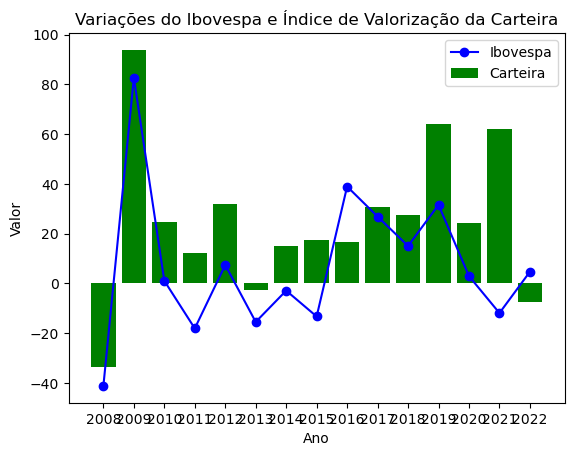

In [110]:
import matplotlib.pyplot as plt

# Dados para representar variações do ibovespa
anos = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
ibov = [-41.22, 82.66, 1.04, -18.11, 7.4, -15.5, -2.91, -13.31, 38.93, 26.86, 15.03, 31.58, 2.92, -11.93, 4.69]

# Dados para representar o índice de valorização da carteira
carteira = [perc_carteira2008, perc_carteira2009, perc_carteira2010, perc_carteira2011, perc_carteira2012, perc_carteira2013, perc_carteira2014, perc_carteira2015, perc_carteira2016, perc_carteira2017, perc_carteira2018, perc_carteira2019, perc_carteira2020, perc_carteira2021, perc_carteira2022]

# Criando o gráfico
plt.plot(anos, ibov, '-o', color='b', label='Ibovespa')
plt.bar(anos, carteira, color='g', label='Carteira')

# Configurando o gráfico
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Variações do Ibovespa e Índice de Valorização da Carteira')
plt.legend()

plt.show()

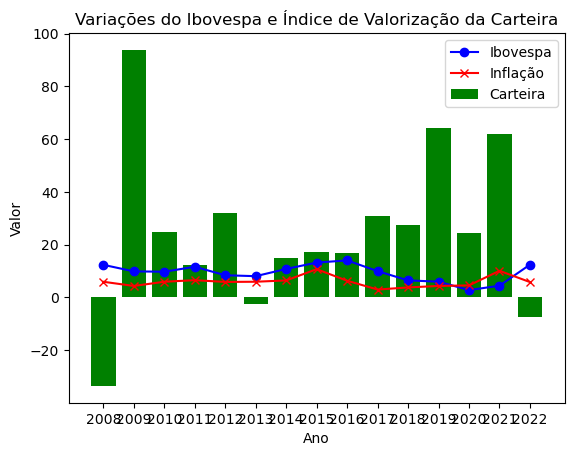

In [115]:
# Dados para representar variações do ibovespa
anos = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
inflacao = [5.9, 4.31, 5.91, 6.5, 5.84, 5.91, 6.41, 10.67, 6.29, 2.95, 3.75, 4.31, 4.52, 10.06, 5.79]
CDI = [12.32, 9.84, 9.71, 11.59, 8.37, 8.02, 10.77, 13.18, 14, 9.93, 6.42, 5.94, 2.75, 4.39, 12.39]

# Dados para representar o índice de valorização da carteira
carteira = [perc_carteira2008, perc_carteira2009, perc_carteira2010, perc_carteira2011, perc_carteira2012, perc_carteira2013, perc_carteira2014, perc_carteira2015, perc_carteira2016, perc_carteira2017, perc_carteira2018, perc_carteira2019, perc_carteira2020, perc_carteira2021, perc_carteira2022]

# Criando o gráfico
plt.plot(anos, CDI, '-o', color='b', label='Ibovespa')
plt.bar(anos, carteira, color='g', label='Carteira')
plt.plot(anos, inflacao, '-x', color='r', label='Inflação')

# Configurando o gráfico
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Variações do Ibovespa e Índice de Valorização da Carteira')
plt.legend()

plt.show()

In [116]:
#Valores ano a anos do ibov

valor_inicial = 100000
valor_atual = valor_inicial

for i in range(len(ibov)):
    valor_atual = valor_atual * (1 + ibov[i]/100)
    print(f'Valor da carteira em {2008+i}: {valor_atual}')

Valor da carteira em 2008: 58780.0
Valor da carteira em 2009: 107367.548
Valor da carteira em 2010: 108484.17049919999
Valor da carteira em 2011: 88837.68722179487
Valor da carteira em 2012: 95411.67607620769
Valor da carteira em 2013: 80622.8662843955
Valor da carteira em 2014: 78276.74087551958
Valor da carteira em 2015: 67858.10666498792
Valor da carteira em 2016: 94275.26758966772
Valor da carteira em 2017: 119597.60446425246
Valor da carteira em 2018: 137573.12441522963
Valor da carteira em 2019: 181018.71710555913
Valor da carteira em 2020: 186304.46364504143
Valor da carteira em 2021: 164078.34113218798
Valor da carteira em 2022: 171773.61533128758


In [119]:
#Valores ano a anos do selic

SELIC = [12.48, 9.92, 9.78, 11.62, 8.48, 8.21, 10.91, 13.29, 14.03, 9.96, 6.42, 5.95, 2.75, 4.44, 12.38]
valor_inicial2 = 100000
valor_atual2 = valor_inicial2

for i in range(len(SELIC)):
    valor_atual2 = valor_atual2 * (1 + SELIC[i]/100)
    print(f'Valor da carteira em {2008+i}: {valor_atual2}')

Valor da carteira em 2008: 112480.0
Valor da carteira em 2009: 123638.01599999999
Valor da carteira em 2010: 135729.81396479998
Valor da carteira em 2011: 151501.61834750974
Valor da carteira em 2012: 164348.95558337856
Valor da carteira em 2013: 177842.00483677394
Valor da carteira em 2014: 197244.56756446598
Valor da carteira em 2015: 223458.3705937835
Valor da carteira em 2016: 254809.5799880913
Valor da carteira em 2017: 280188.6141549052
Valor da carteira em 2018: 298176.7231836501
Valor da carteira em 2019: 315918.2382130773
Valor da carteira em 2020: 324605.98976393696
Valor da carteira em 2021: 339018.49570945575
Valor da carteira em 2022: 380988.98547828634


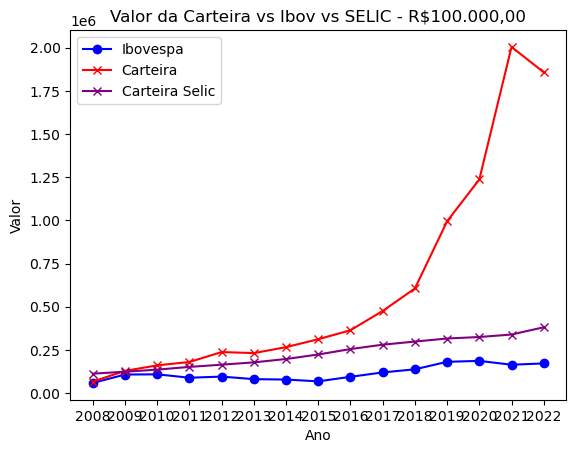

In [120]:
carteira_ibov = [58780.0, 107367.55, 108484.17, 88837.69, 95411.68, 80622.87, 78276.74, 67858.11, 94275.27, 119597.60, 137573.12, 181018.72, 186304.46, 164078.34, 171773.62]
carteira_total = [valor_carteira_2009, valor_carteira_2010, valor_carteira_2011, valor_carteira_2012, valor_carteira_2013, valor_carteira_2014, valor_carteira_2015, valor_carteira_2016, valor_carteira_2017, valor_carteira_2018, valor_carteira_2019, valor_carteira_2020, valor_carteira_2021, valor_carteira_2022, valor_carteira_2023]
carteira_selic = [112480.0, 123638.02, 135729.81, 151501.62, 164348.96, 177842.00, 197244.57, 223458.37, 254809.58, 280188.61, 298176.72, 315918.24, 324605.99, 339018.50, 380988.99]
anos = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Criando o gráfico
plt.plot(anos, carteira_ibov, '-o', color='b', label='Ibovespa')
plt.plot(anos, carteira_total, '-x', color='r', label='Carteira')
plt.plot(anos, carteira_selic, '-x', color='purple', label='Carteira Selic')

# Configurando o gráfico
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Valor da Carteira vs Ibov vs SELIC - R$100.000,00')
plt.legend()

plt.show()

In [132]:
#Quadro Sinóptico

rentabilidade = (valor_carteira_2023 / 1000)
rentabilidade_ibov = 171773.61 / 1000
rentabilidade_selic = 380988.99 / 1000
ganho_medio = rentabilidade / 15

# Criar o dataframe
resultado_total = pd.DataFrame({
    "Parametros": ["Ganho da Carteira", "Ganho do IBOV", "Ganho da SELIC", "Ganho Carteira (médio a.a)"],
    "Percentual": [round(rentabilidade, 2), round(rentabilidade_ibov,2), round(rentabilidade_selic,2), round(ganho_medio,2)]
})

# Exibir o dataframe
resultado_total

,Parametros,Percentual
0,Ganho da Carteira,1857.24
1,Ganho do IBOV,171.77
2,Ganho da SELIC,380.99
3,Ganho Carteira (médio a.a),123.82
